# 100 задач с matplotlib
<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Оглавление <a name='toc'>
    
<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#env'>Загрузка необходимых библиотек. Системные настройки.</a></li>
<li><a href='#structure'>Иерархия объектов matplotlib.</a></li>
<li><a href='#params'>Изменение параметров объектов matplotlib.</a></li>
<li><a href='#create'>Графики</a></li>
<li><a href='#text'>Текст</a></li>
<li><a href='#diagrams'>Диаграммы</a></li>
<li><a href='#animation'>Анимация</a></li>
<li><a href='#3d'>Трехмерная графика</a></li>
<li><a href='#tasks'>Разные задачи</a></li>
<li><a href='#io'>Ввод и вывод данных</a></li>
<li><a href='#links'>Ссылки</a></li>
<li><a href='#tasks'>Задания для самостоятельной работы</a></li>
</ol>


# Введение <a name='intro'></a>

Документ содержит практические примеры использования библиотеки matplotlib для работы с графикой.

Материал состоит из 100 типовых задач, которые можно выполнить с помощью функций matplotlib.

Для удобства задачи разбиты на группы, к которым можно быстро перейти в <a href='#toc'>Оглавлении</a>.

Python библиотека matplotlib (https://matplotlib.org/) предназначена для работы с графикой.

<a href='#toc'>Назад к Оглавлению</a>

# Загрузка необходимых библиотек. Системные настройки.
<a name='env'></a>

#### Импортировать библиотеку matplotlib и посмотреть текущую используемую версию.

In [1]:
import numpy as np
import math
from scipy.stats import norm 

import matplotlib
from matplotlib import pyplot as plt

In [2]:
m = !pip freeze
for elem in m: 
    if elem.find("matplotlib")!=-1:         
        print(elem)
        
print(matplotlib.__version__)
print(matplotlib.get_backend())

matplotlib==3.1.3
3.1.3
module://ipykernel.pylab.backend_inline


In [3]:
plt.style.use('ggplot')

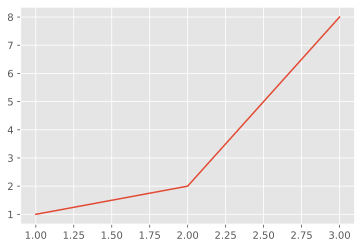

In [4]:
%config InlineBackend.figure_format = 'svg'
plt.plot([1,2,3],[1,2,8])

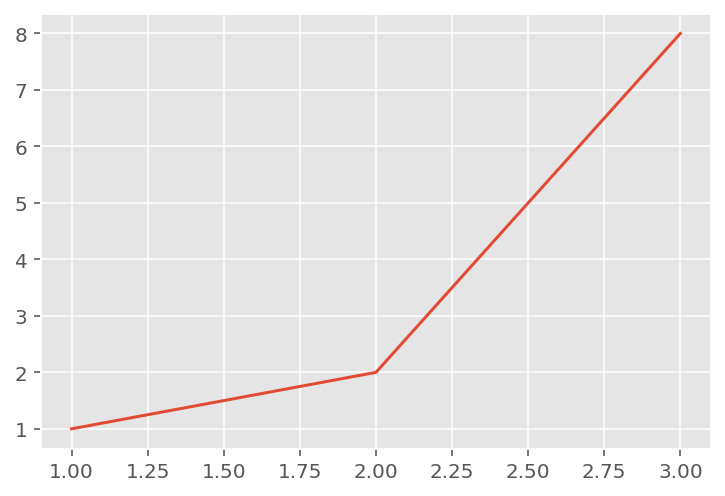

In [5]:
%config InlineBackend.figure_format = 'retina'
plt.plot([1,2,3],[1,2,8])

#### Посмотреть ключи rcParams

In [6]:
for k in plt.rcParams.keys():
    if k.find('size') != -1:
        print("key: {}, {}".format(k, plt.rcParams[k]))

key: agg.path.chunksize, 0
key: axes.labelsize, large
key: axes.titlesize, x-large
key: boxplot.flierprops.markersize, 6.0
key: boxplot.meanprops.markersize, 6.0
key: errorbar.capsize, 0.0
key: figure.figsize, [6.0, 4.0]
key: figure.titlesize, large
key: font.size, 10.0
key: legend.fontsize, medium
key: legend.title_fontsize, None
key: lines.markersize, 6.0
key: ps.papersize, letter
key: xtick.labelsize, medium
key: xtick.major.size, 3.5
key: xtick.minor.size, 2.0
key: ytick.labelsize, medium
key: ytick.major.size, 3.5
key: ytick.minor.size, 2.0


In [7]:
plt.rcParams['image.cmap']

'viridis'

<a href='#toc'>Назад к Оглавлению</a>

# Иерархия объектов matplotlib <a name='structure'></a>

#### figure, axes, axis, artist

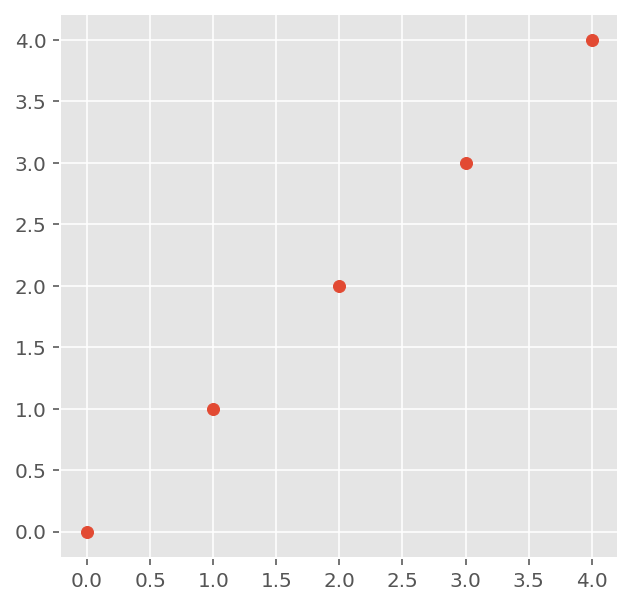

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(range(5), range(5))

#### axes

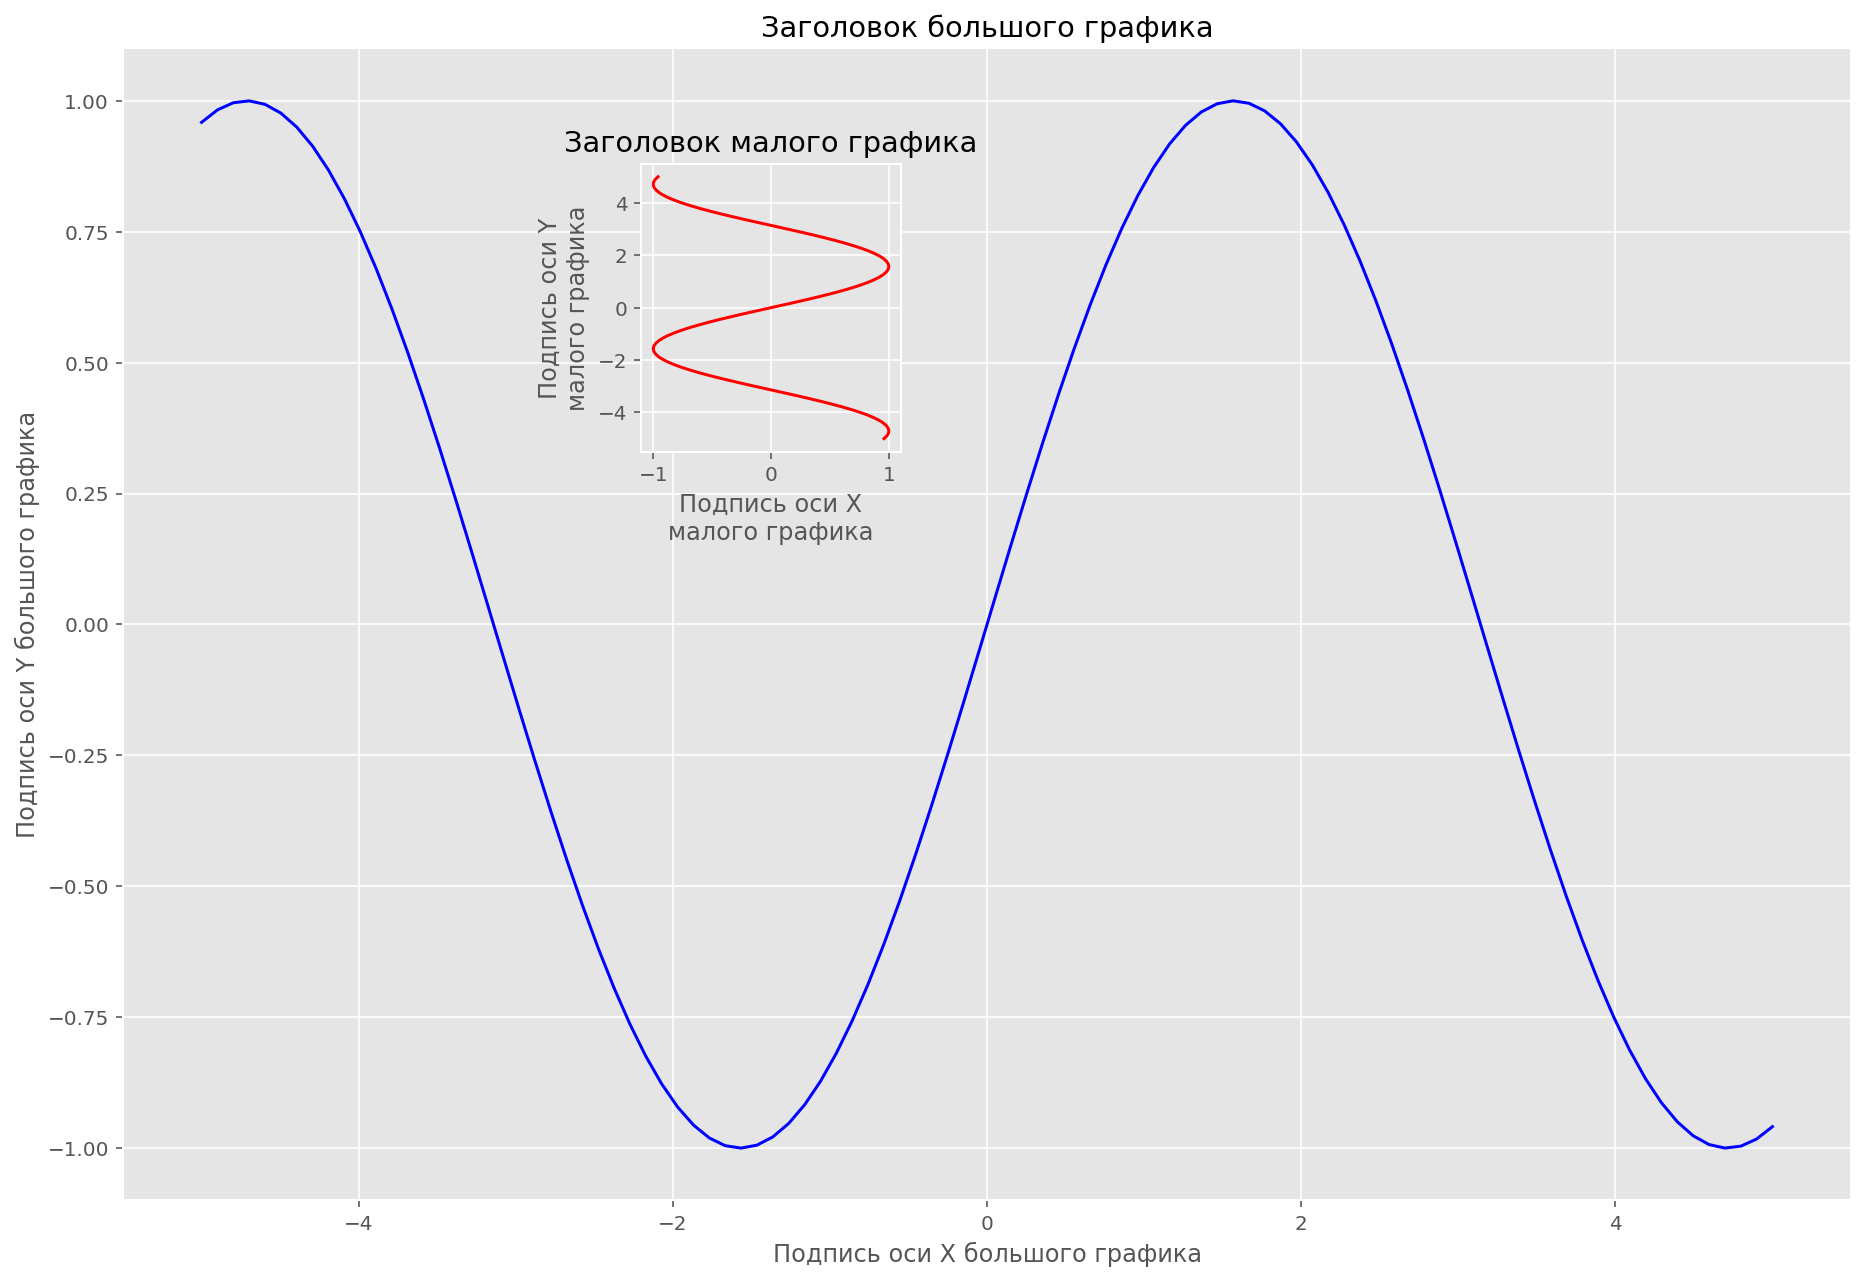

In [9]:
xs = np.linspace(-5, 5, 100)
ys = np.sin(xs)

fig = plt.figure()

axes1 = fig.add_axes([0, 1, 2, 2])
axes2 = fig.add_axes([0.6, 2.3, 0.3, 0.5])

axes1.plot(xs, ys, 'b')
axes1.set_xlabel('Подпись оси X большого графика')
axes1.set_ylabel('Подпись оси Y большого графика')
axes1.set_title('Заголовок большого графика')

axes2.plot(ys, xs, 'r')
axes2.set_xlabel('Подпись оси X\nмалого графика')
axes2.set_ylabel('Подпись оси Y\nмалого графика')
axes2.set_title('Заголовок малого графика');

#### axis

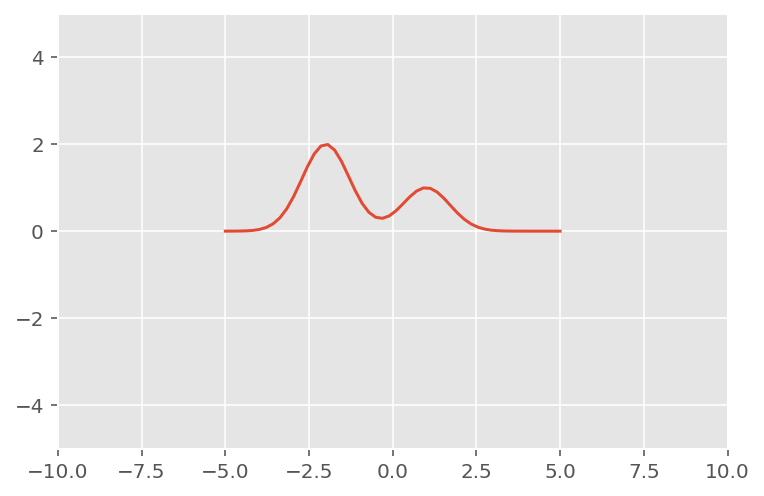

In [10]:
xs = np.linspace(-5, 5)
ys = np.exp(-(xs-1)**2) + 2*np.exp(-(xs+2)**2)
plt.axis([-10, 10 , -5, 5])
plt.plot(xs, ys)
plt.show()

In [11]:
#xaxis.set_visible

#### artist

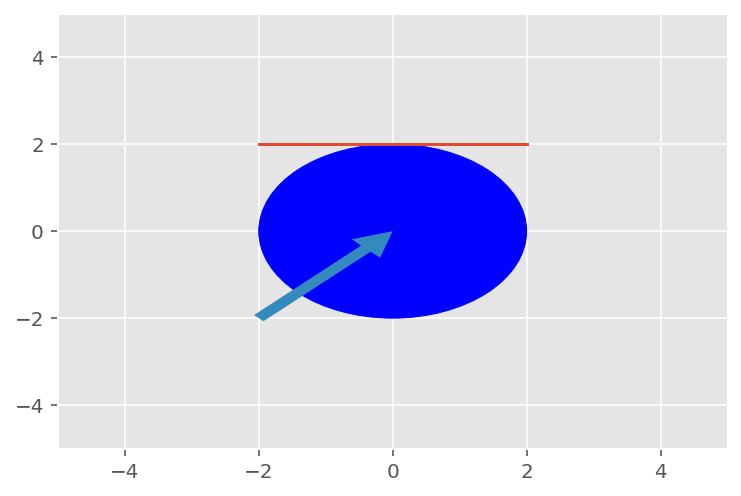

In [12]:
fig, ax = plt.subplots() 
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.add_artist(plt.Circle((0,0), 2, color='b'))
ax.add_artist(plt.Line2D((-2,2), (2,2)))
ax.add_artist(plt.Arrow(x=-2, y=-2, dx=2, dy=2))
#ax.add_artist(plt.Polygon([1,2,3],[1,2,3]) )
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Изменение параметров объектов matplotlib <a name='params'></a>

#### Установить размеры рисунка

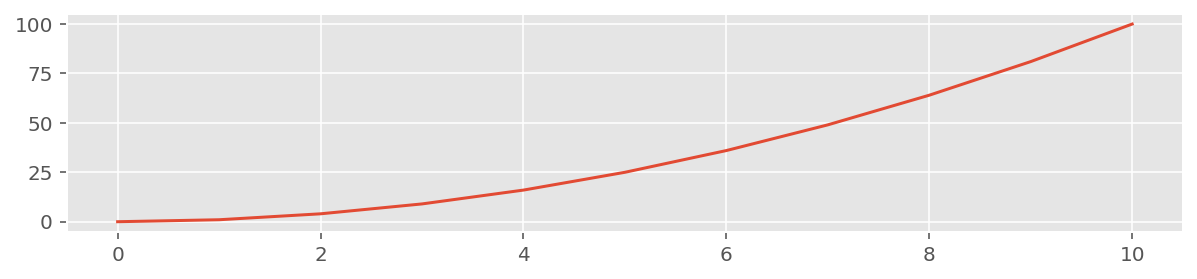

In [13]:
plt.figure(figsize=(10,2))
plt.plot([x for x in range(0,11)], [x**2 for x in range(0,11)])
plt.show()

(0.0, 1.0) (0.0, 1.0)


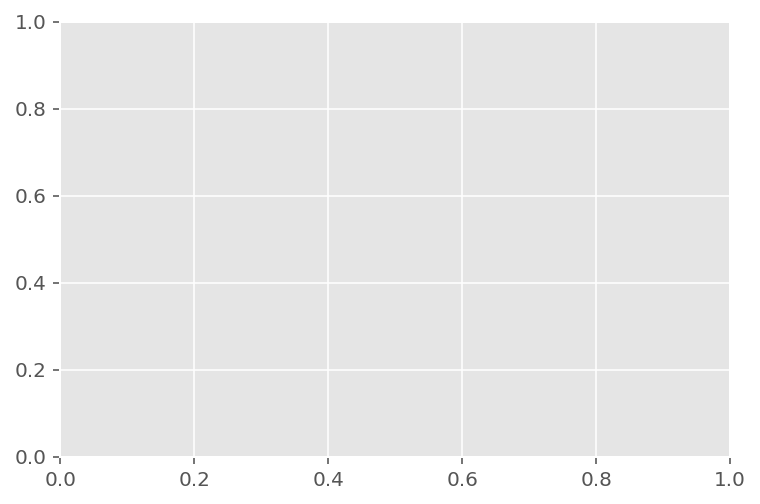

In [14]:
fig, ax = plt.subplots(1)
print(ax.get_xlim(), ax.get_ylim())

#### Установить диапазоны значений осей

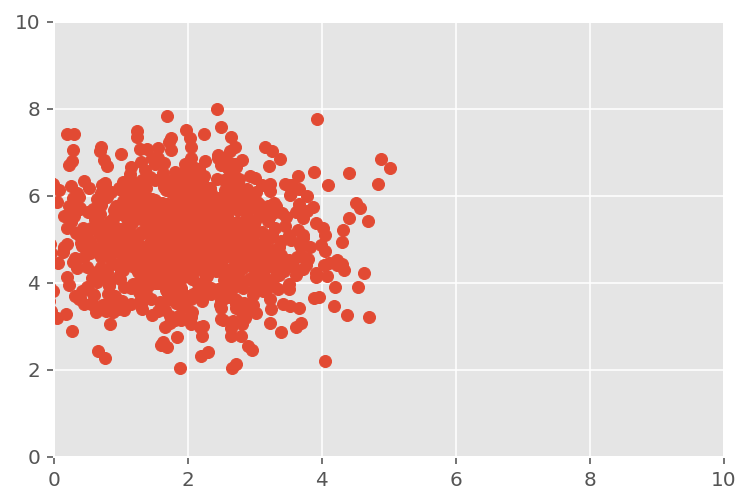

In [15]:
plt.xlim(0,10)
plt.ylim(0,10)
plt.scatter([np.random.normal(size=(1,11), loc=2) for _ in range(100)], 
            [np.random.normal(size=(1,11), loc=5) for _ in range(100)])
plt.show()

#### Установить подписи осей и рисунка

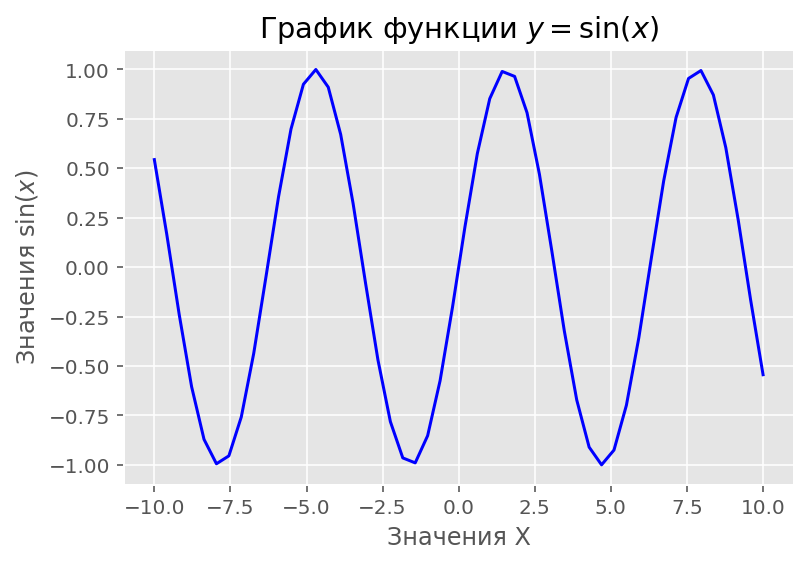

In [16]:
xs = np.linspace(-10, 10, 50)
ys = np.sin(xs)
plt.xlabel('Значения X')
plt.ylabel('Значения $\sin(x)$')
plt.plot(xs, ys, c='b')
plt.title('График функции $y=\sin(x)$')
plt.show()

#### Оси

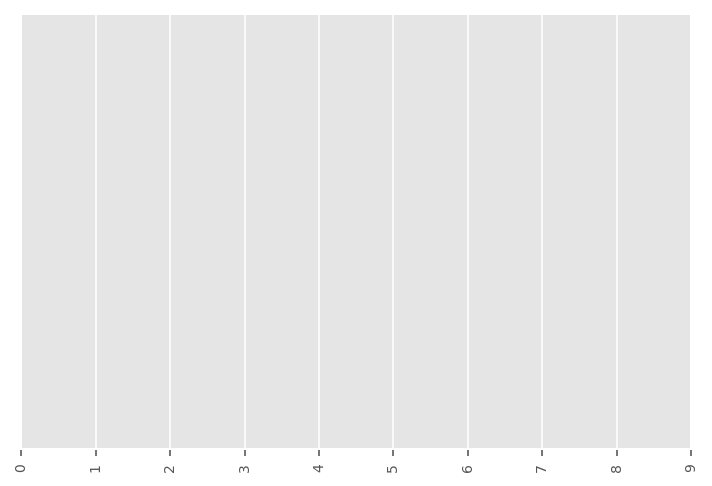

In [17]:
plt.xticks([i for i in range(10)], [i for i in range(10)], rotation = 90, fontsize = 7 )
plt.yticks([])
plt.show()

([<matplotlib.axis.XTick at 0xee15850>,
 <a list of 3 Text xticklabel objects>)

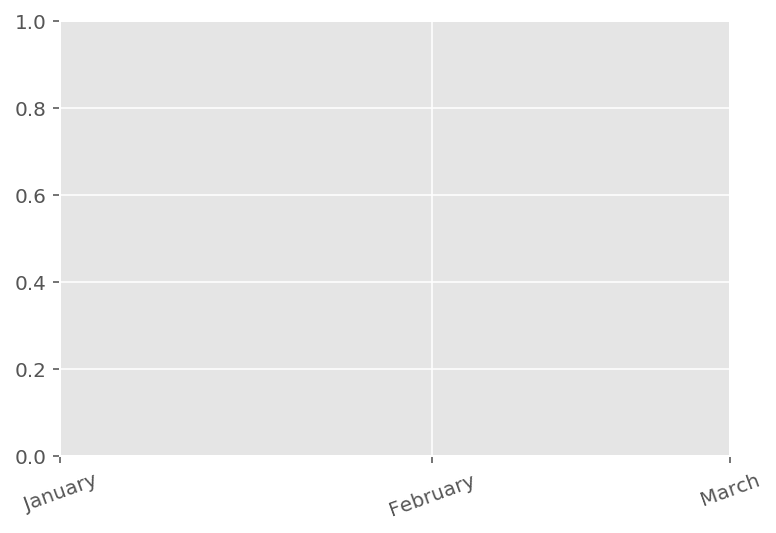

In [18]:
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 1, step=0.2))  # Set label locations.
plt.xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])  # Set text labels.
plt.xticks([0, 50, 90], ['January', 'February', 'March'], rotation=20)  # Set text labels and properties.


In [19]:
import matplotlib.ticker as ticker

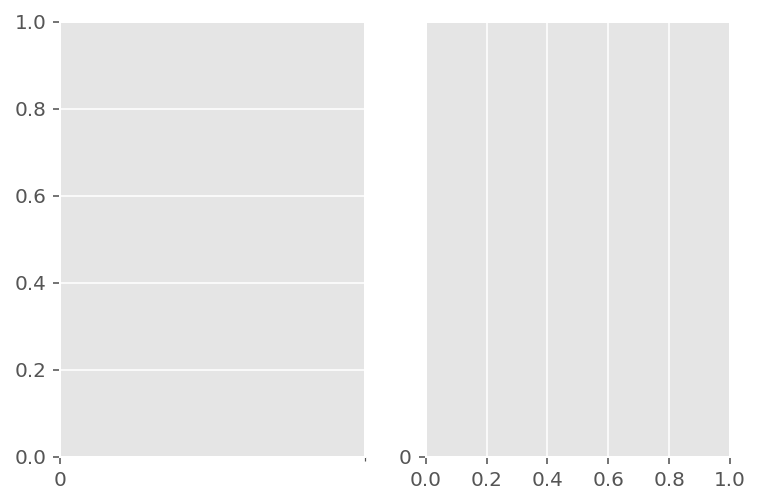

In [20]:
fig, ax = plt.subplots(1,2)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(2))
ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(50))
ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(10))

#### Убрать сетку

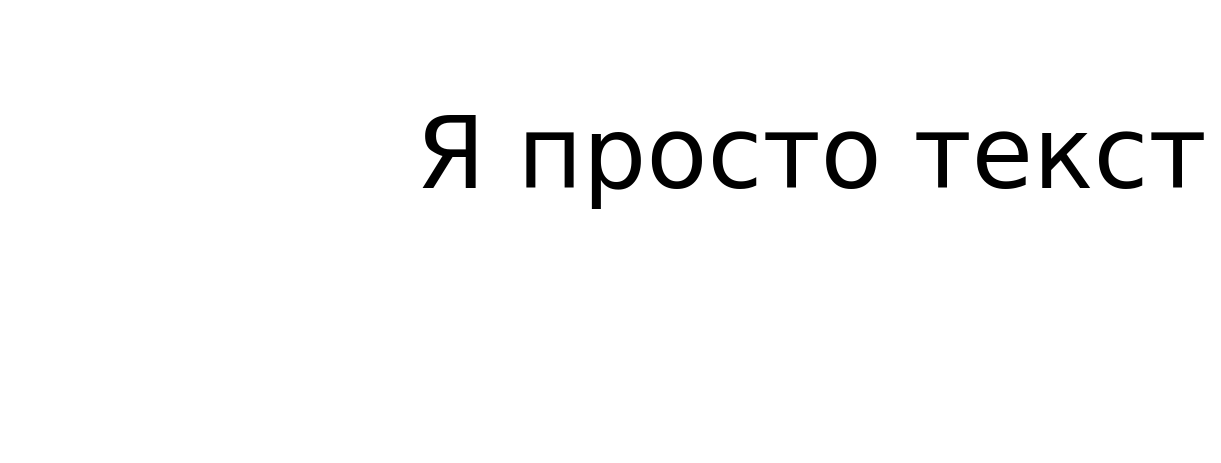

In [21]:
plt.xlim(0,5)
plt.ylim(0,5)
plt.axis('off')
plt.text(3,3,"Я просто текст", size=50)
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Графики <a name='create'></a>

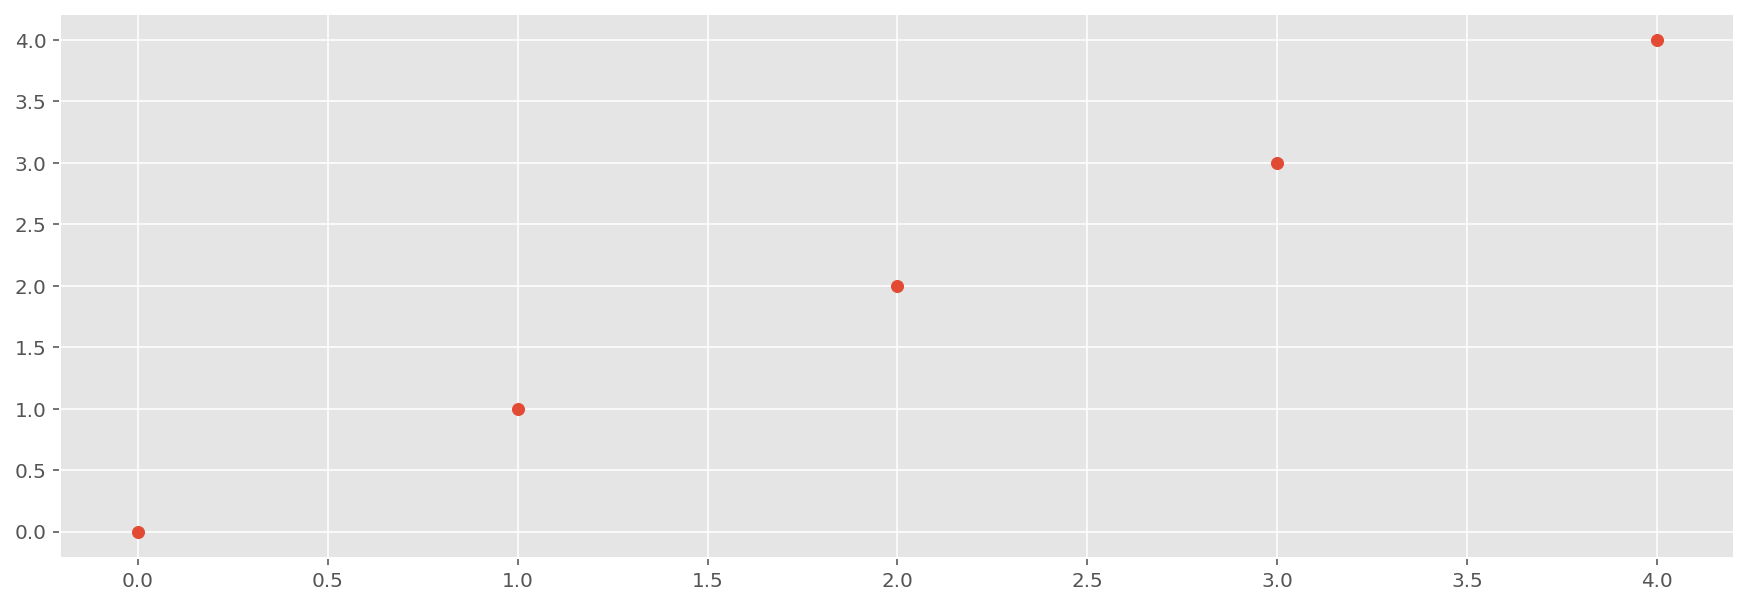

In [52]:
xs = range(5)
ys = range(5)
plt.scatter(xs, ys)

#### Нарисовать графики произвольных непрерывных функций разными цветами (зеленый, желтый, красный, синий, черный), разной плотности (5 разных значений), разными стилями (сплошная линия, пунктирная, «точка-тире»). 

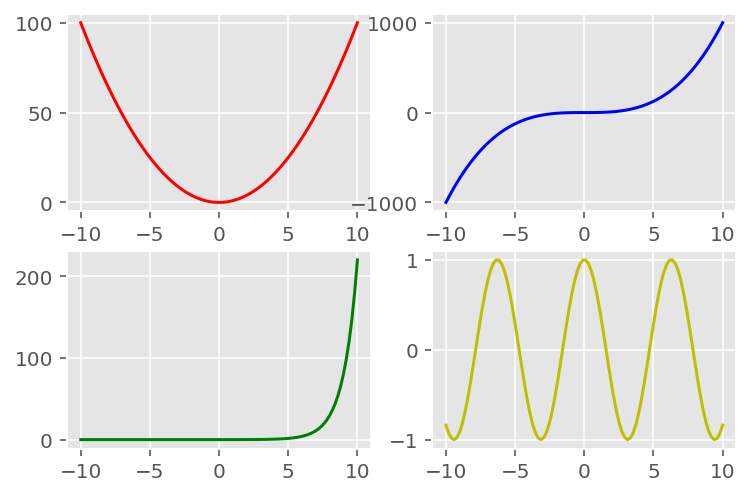

In [22]:
x = np.linspace(-10,10,100)
fig,ax = plt.subplots(2,2)
ax[0][0].plot(x,[i**2 for i in x],color="r", label="square")
ax[0][1].plot(x,[i**3 for i in x],color="b", label="cube")
ax[1][0].plot(x,[np.exp(i)/100 for i in x], color="g", label="exp")
ax[1][1].plot(x,[np.cos(i) for i in x], color="y", label="cosine")
plt.show()

#### Нарисовать графики произвольных дискретных (численно заданных) функций, ис-пользуя разные цвета (зеленый, желтый, красный, синий, черный) и стили точек (квадрат, круг, треугольник, «алмаз»)

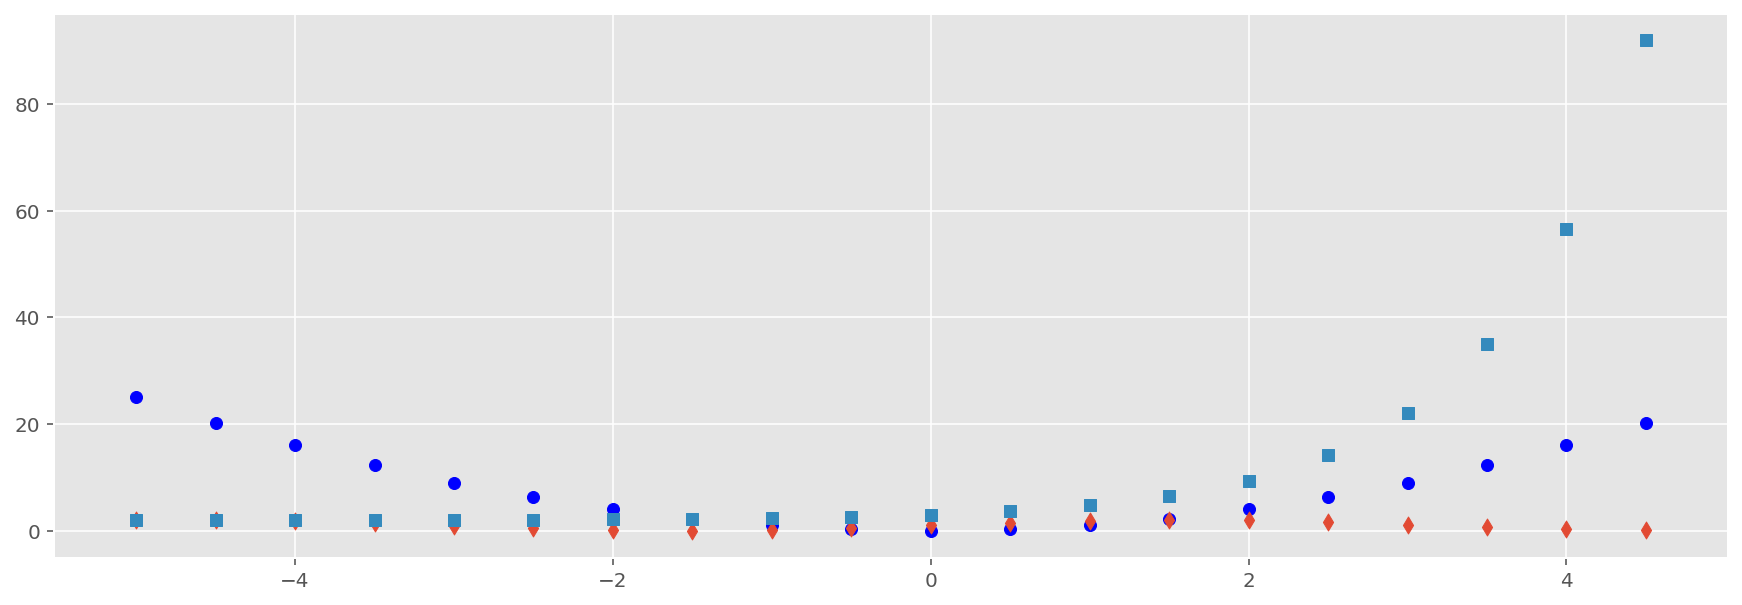

In [54]:
x = np.arange(-5,5,0.5)
y1 = [i**2 for i in x]
y2 = [math.sin(i)+1 for i in x]
y3 = [math.exp(i)+2 for i in x]
plt.scatter(x, y1, marker="o", color='blue')
plt.scatter(x, y2, marker="d")
plt.scatter(x, y3, marker="s")
plt.grid(True)

#### Нарисовать график плотности нормального распределения, указать значение математического ожидания и дисперсии. На этом же рисунке нарисовать график плотности нормального распределения с меньшими математическим ожиданием и  дисперсией.

In [56]:
np.linspace(-20,20,100)

array([-20.        , -19.5959596 , -19.19191919, -18.78787879,
       -18.38383838, -17.97979798, -17.57575758, -17.17171717,
       -16.76767677, -16.36363636, -15.95959596, -15.55555556,
       -15.15151515, -14.74747475, -14.34343434, -13.93939394,
       -13.53535354, -13.13131313, -12.72727273, -12.32323232,
       -11.91919192, -11.51515152, -11.11111111, -10.70707071,
       -10.3030303 ,  -9.8989899 ,  -9.49494949,  -9.09090909,
        -8.68686869,  -8.28282828,  -7.87878788,  -7.47474747,
        -7.07070707,  -6.66666667,  -6.26262626,  -5.85858586,
        -5.45454545,  -5.05050505,  -4.64646465,  -4.24242424,
        -3.83838384,  -3.43434343,  -3.03030303,  -2.62626263,
        -2.22222222,  -1.81818182,  -1.41414141,  -1.01010101,
        -0.60606061,  -0.2020202 ,   0.2020202 ,   0.60606061,
         1.01010101,   1.41414141,   1.81818182,   2.22222222,
         2.62626263,   3.03030303,   3.43434343,   3.83838384,
         4.24242424,   4.64646465,   5.05050505,   5.45

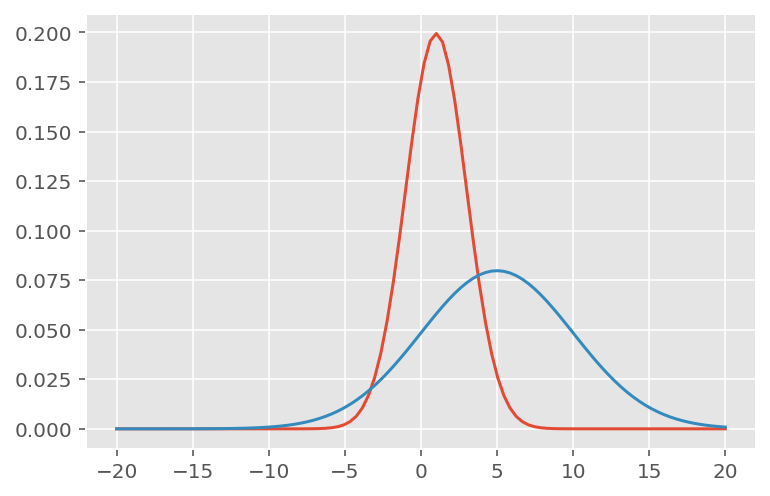

In [24]:
x = np.linspace(-20,20,100)
m, sigma = 1, 2
y1 = [norm(m,sigma).pdf(i) for i in x]
plt.plot(x, y1)
m, sigma = 5,5
y2 = [norm(m,sigma).pdf(i) for i in x]
plt.plot(x,y2)
plt.grid(True)

#### Нарисовать график функции y(x)=2*sin(3x-1)

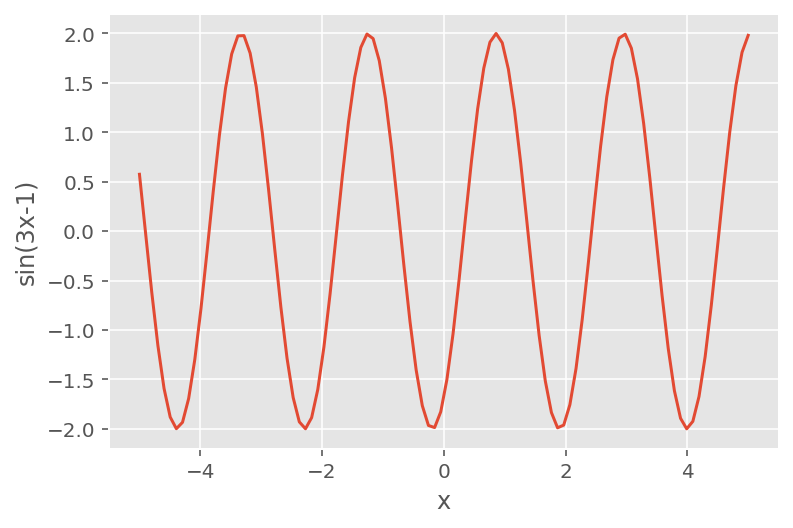

In [25]:
x = np.linspace(-5,5,100)
y1 = [2*np.sin(3*i-1) for i in x]
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin(3x-1)")
plt.plot(x, y1)

#### Нарисовать график функции в полярных координатах

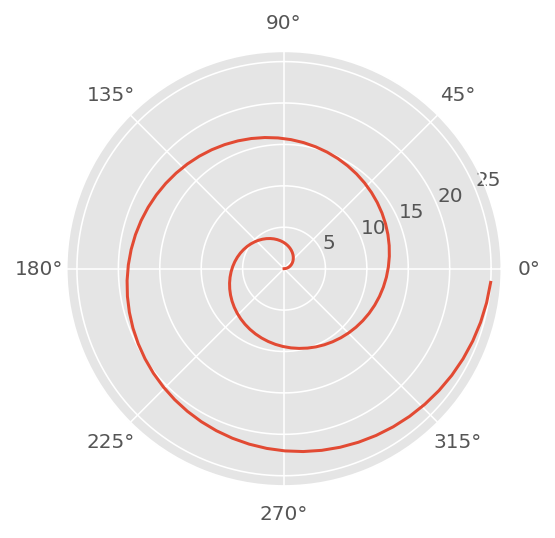

In [26]:
phi = np.arange(0,4*np.pi,0.1)
rho = 2*phi
plt.subplot(polar=True)
plt.plot(phi,rho)
plt.show()

#### Нарисовать вектор

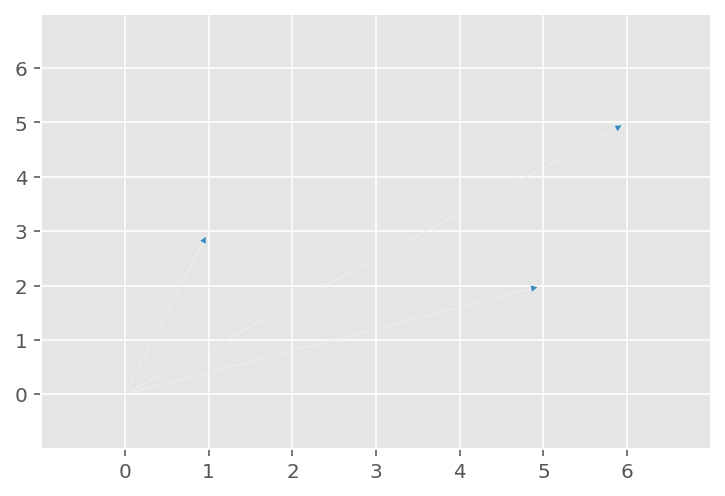

In [27]:
plt.xlim(-1, 7)
plt.ylim(-1, 7)
a = np.array ([1, 3])
b = np.array ([5, 2])
c = a + b
arrowprops = {'arrowstyle': '<|-',}
plt.annotate (u'', xy=(0, 0), xytext = a, arrowprops = arrowprops)
plt.annotate (u'', xy=(0, 0), xytext = b, arrowprops = arrowprops)
plt.annotate (u'', xy=(0, 0), xytext = c, arrowprops = arrowprops)
plt.grid(True)
plt.xticks(range(7))
plt.yticks(range(7))
plt.show()

#### Отобразить несколько независимых графиков в одном окне

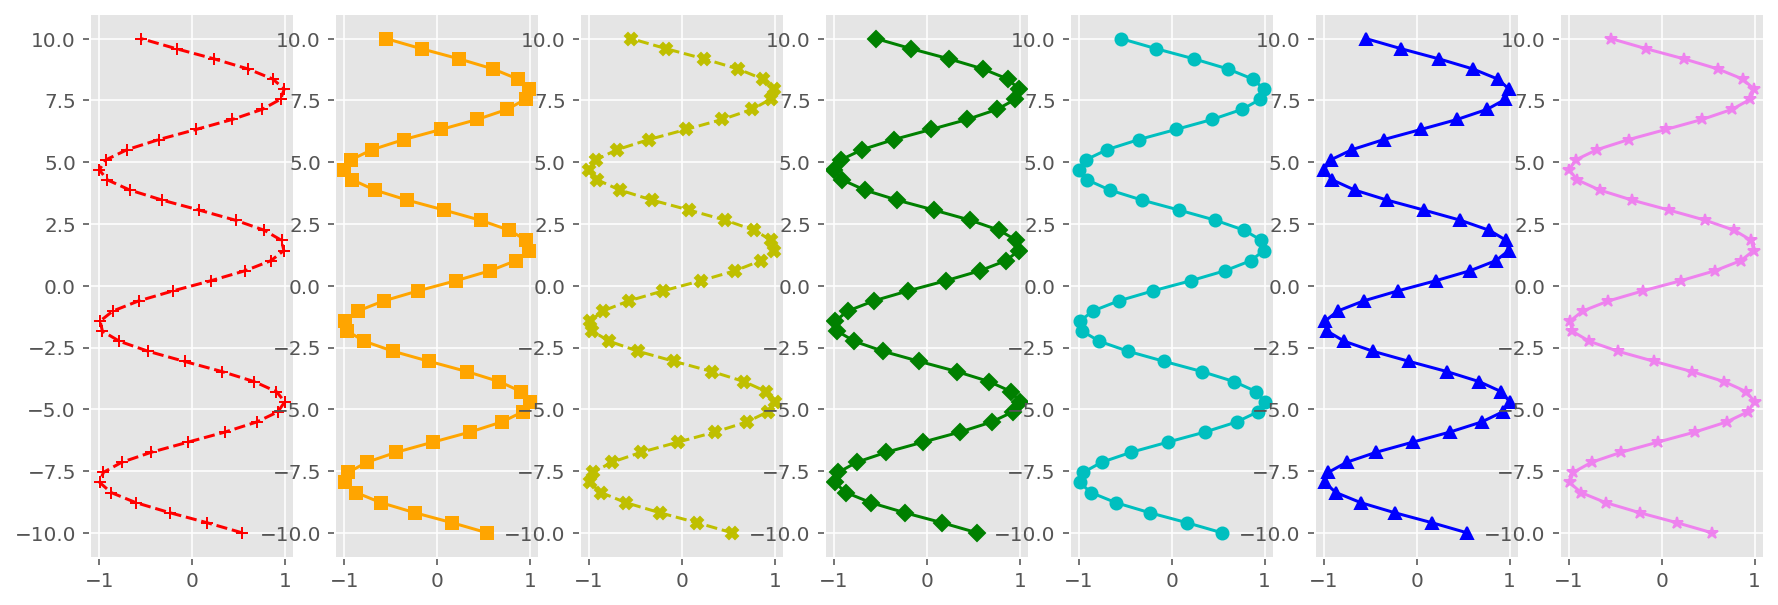

In [28]:
plt.rcParams['figure.figsize']=(15,5)
plt.subplot(1, 7, 1) # plt.subplot(nrows, ncols, plot_number)
plt.plot(ys, xs, 'r+--')
plt.subplot(1, 7, 2)
plt.plot(ys, xs, color='orange', marker='s');
plt.subplot(1, 7, 3)
plt.plot(ys, xs, 'yX--');
plt.subplot(1, 7, 4)
plt.plot(ys, xs, 'gD-');
plt.subplot(1, 7, 5)
plt.plot(ys, xs, 'co-');
plt.subplot(1, 7, 6)
plt.plot(ys, xs, 'b^-');
plt.subplot(1, 7, 7)
plt.plot(ys, xs, color='violet', marker='*');

<a href='#toc'>Назад к Оглавлению</a>

# Текст <a name='text'></a>

#### Добавление легенды к рисунку

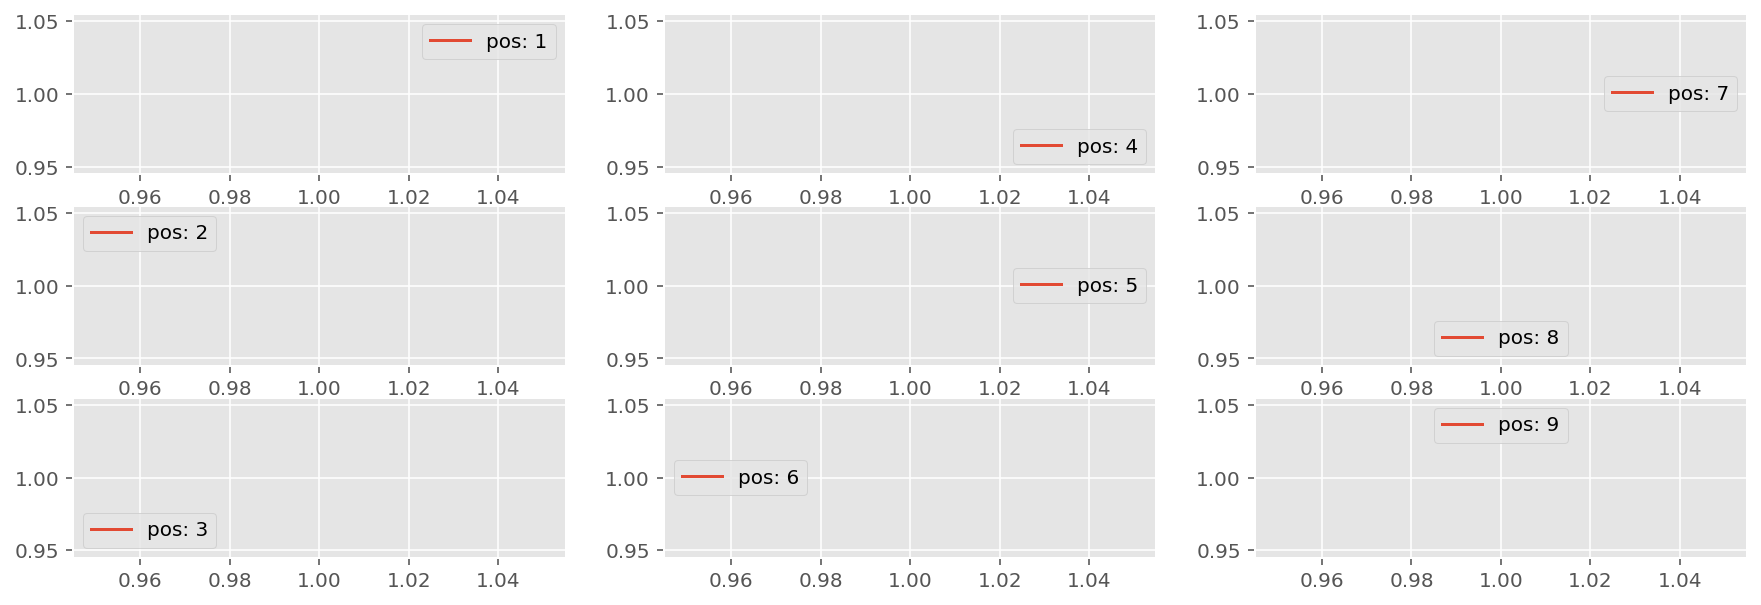

In [29]:
fig, ax = plt.subplots(3,3)
for pos in range(9):
    ax[pos%3][pos//3].plot(1,1, label="pos: {}".format(pos+1))
    ax[pos%3][pos//3].legend(loc=pos+1)

#### Cоздать словарь с ключом–Фамилия и данными «Рост-Вес» отобразить на графике данные точками и у каждой точки подписать соответствующую фамилию.

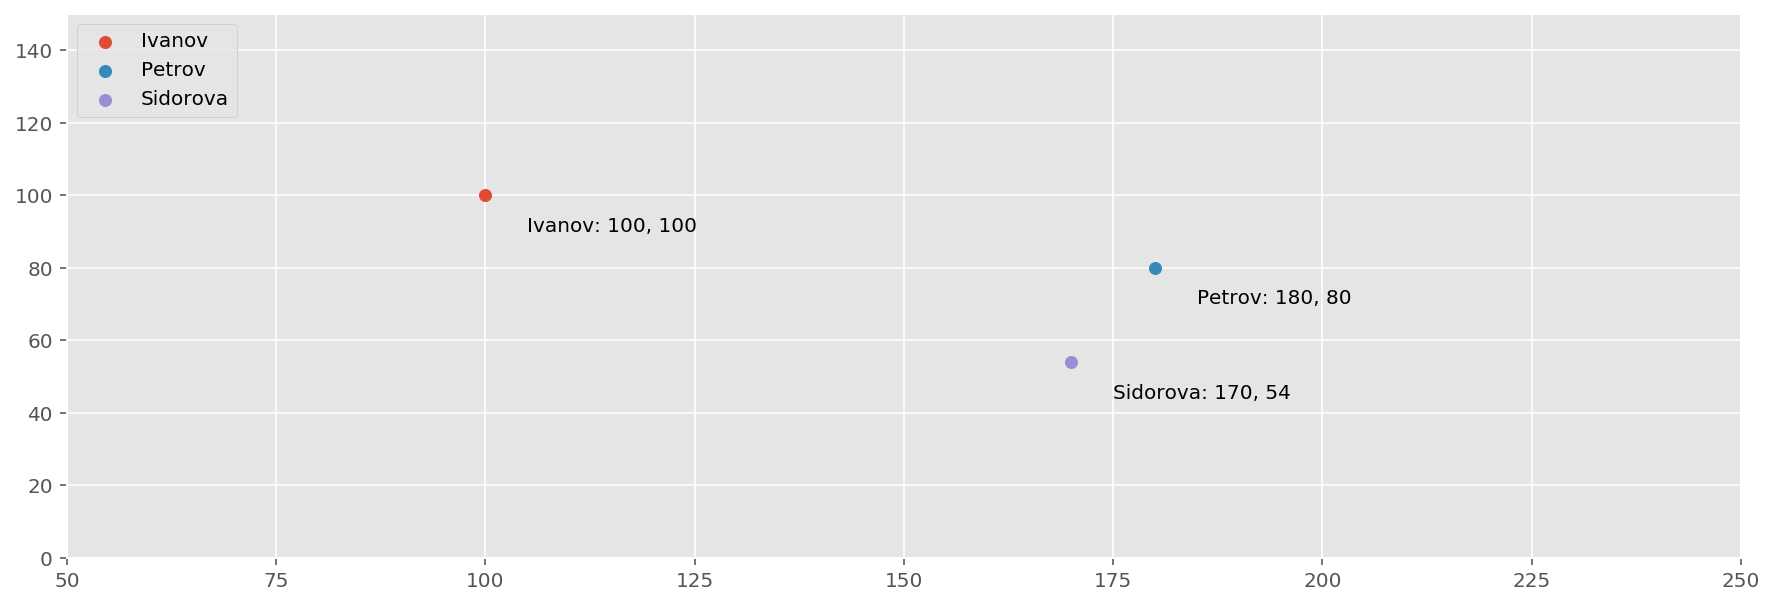

In [30]:
persons = dict({"Ivanov":[100,100], "Petrov":[180,80], "Sidorova":[170,54]})
plt.xlim(50, 250)
plt.ylim(0, 150)
for surname in persons.keys():
    x, y = persons[surname][0], persons[surname][1]
    plt.scatter(x, y, label=surname)
    plt.text(x+5, y-10, surname+": "+str(x)+", "+str(y))
    plt.legend(loc=2)
plt.grid(True)


#### Нарисовать текст с различными параметрами

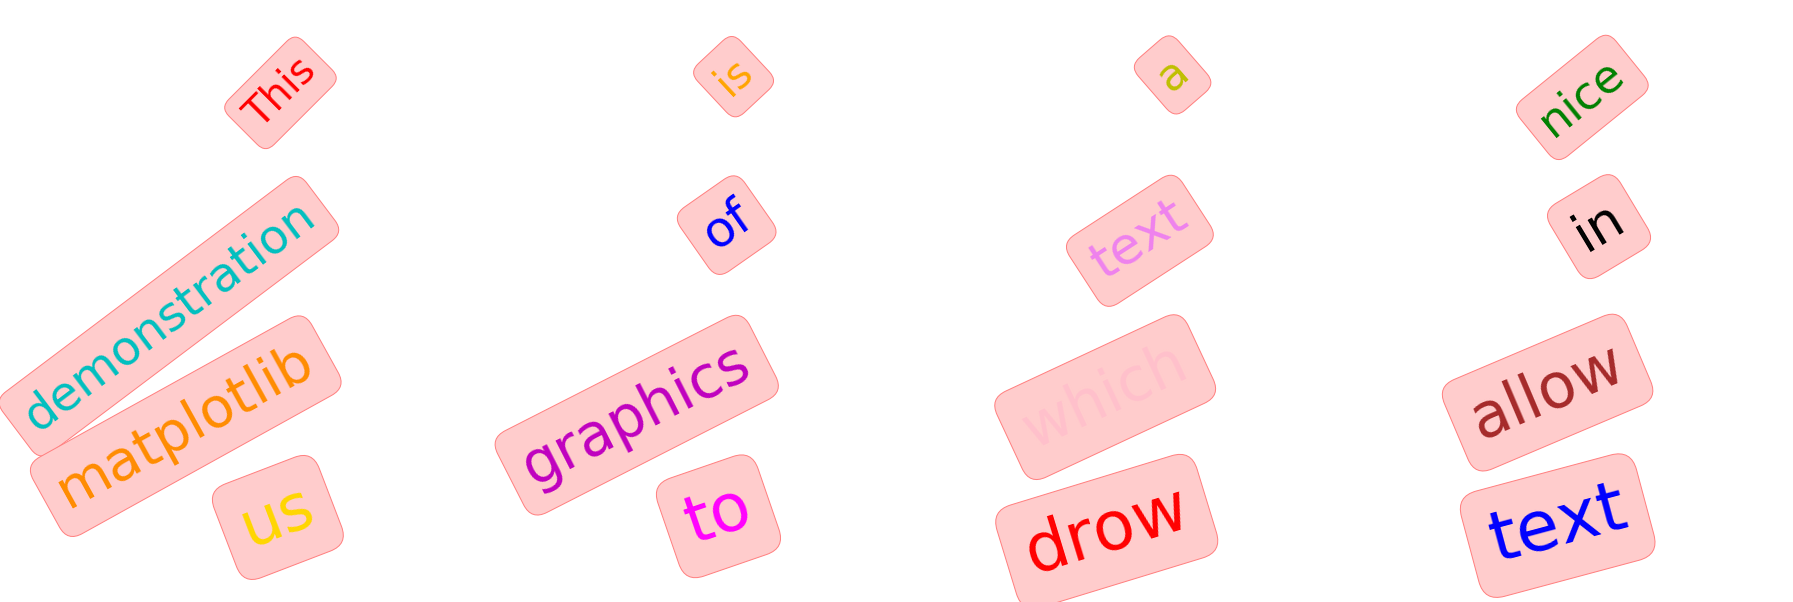

In [31]:
fig, ax = plt.subplots(4,4)
words = ['This', 'is', 'a', 'nice', 'demonstration', 'of', 'text', 'in', 'matplotlib', 'graphics', 
         'which', 'allow', 'us', 'to', 'drow', 'text']
colors = ['r', 'orange', 'y', 'g', 'c', 'b', 'violet', 'k','darkorange','m',
          'pink', 'brown', 'gold', 'fuchsia', 'r', 'b']
for pos in range(16):
    c_ax = ax[pos//4][pos%4]
    c_ax.axis('off')
    c_ax.text(0.6, 0.7, words[pos], color=colors[pos], size=20+pos, rotation=45-pos*2, ha="right", va="top", 
              bbox=dict(boxstyle="round", 
                        ec=(1., 0.5, 0.5),
                        fc=(1., 0.8, 0.8),
                       )
         )
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Диаграммы <a name='diagrams'></a>

#### Построить гистограмму

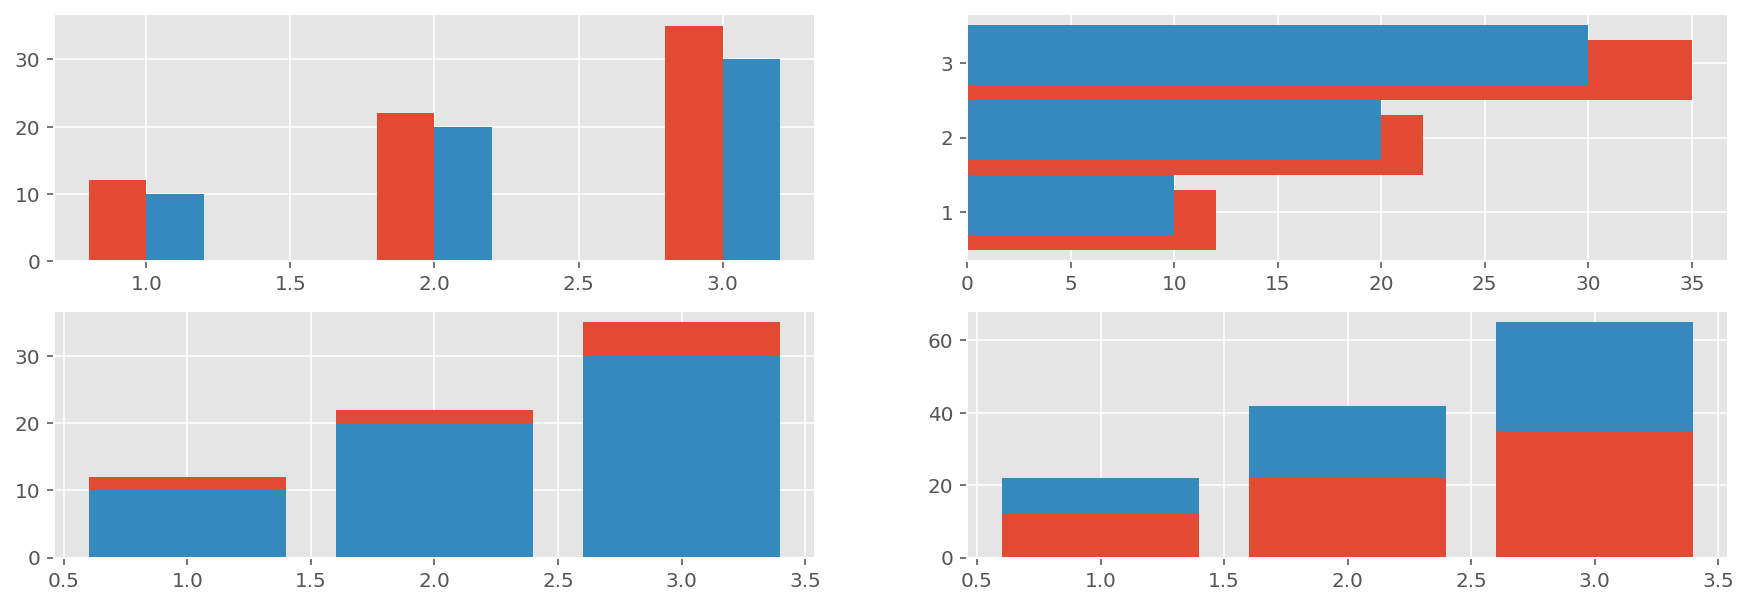

In [32]:
fig, ax = plt.subplots(2,2)
x = [1,2,3]
y1 = [10,20,30]
y2 = [12,22,35]
ax[0][0].bar([i-0.1 for i in x], y2, width=0.2)
ax[0][0].bar([i+0.1 for i in x], y1, width=0.2)
ax[0][1].barh([i-0.1 for i in x], y2)
ax[0][1].barh([i+0.1 for i in x], y1)
ax[1][0].bar(x, y2)
ax[1][0].bar(x, y1)
ax[1][1].bar(x, y2)
ax[1][1].bar(x, y1, bottom=y2)
plt.show()

#### Нарисовать круговую диаграмму 

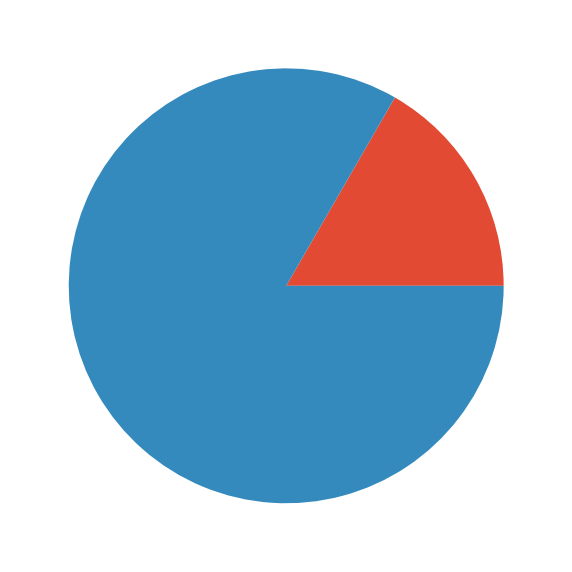

In [33]:
plt.pie([10,50])
plt.show()

#### Нарисовать гистограмму

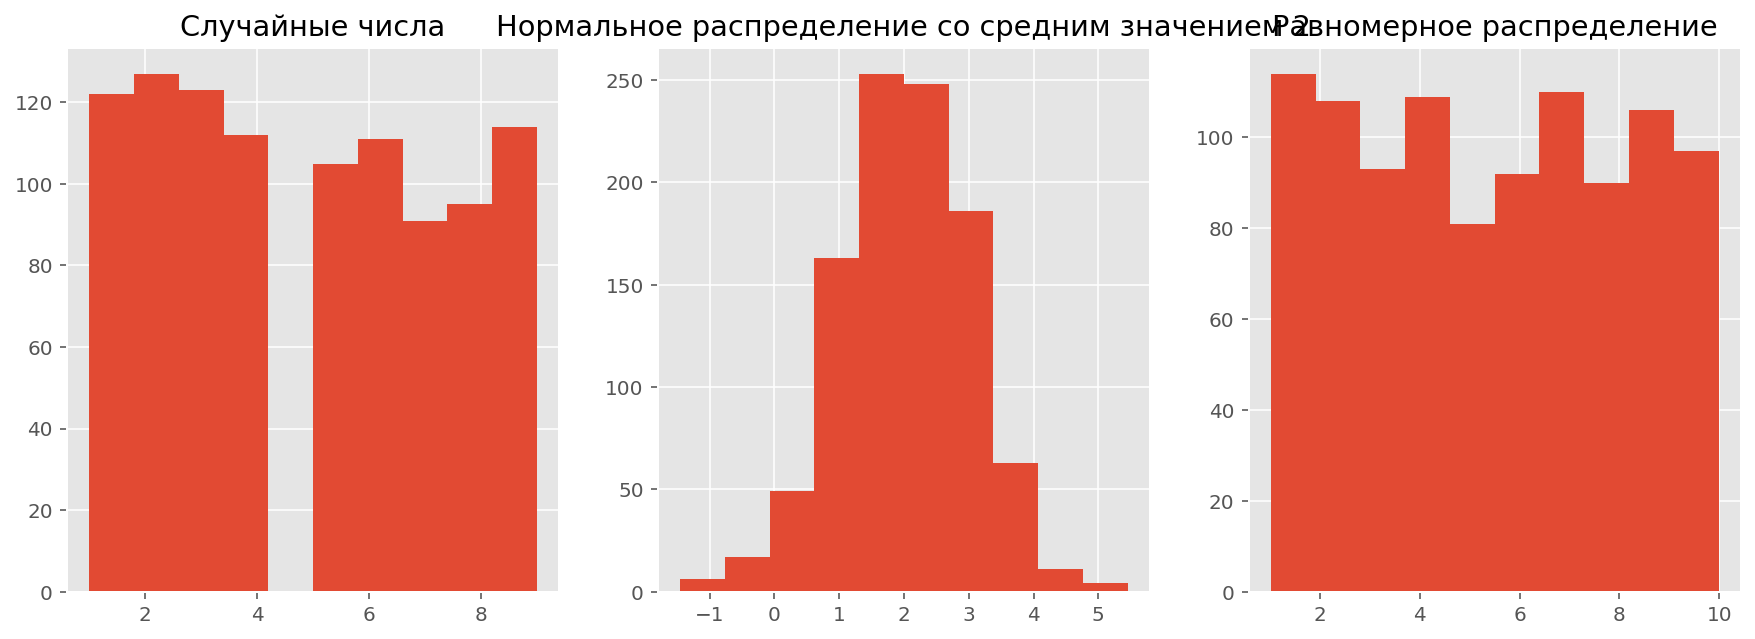

In [34]:
fig, ax = plt.subplots(1,3)
ax[0].hist([np.random.randint(1,10) for _ in range(1000)])
ax[0].set_title("Случайные числа")
ax[1].hist([i for i in np.random.normal(size=(1,1000), loc=2)])
ax[1].set_title("Нормальное распределение со средним значением 2")
ax[2].hist([np.random.uniform(1,10) for _ in range(1000)])
ax[2].set_title("Равномерное распределение")
plt.show()


#### Нарисовать ящик с усами 

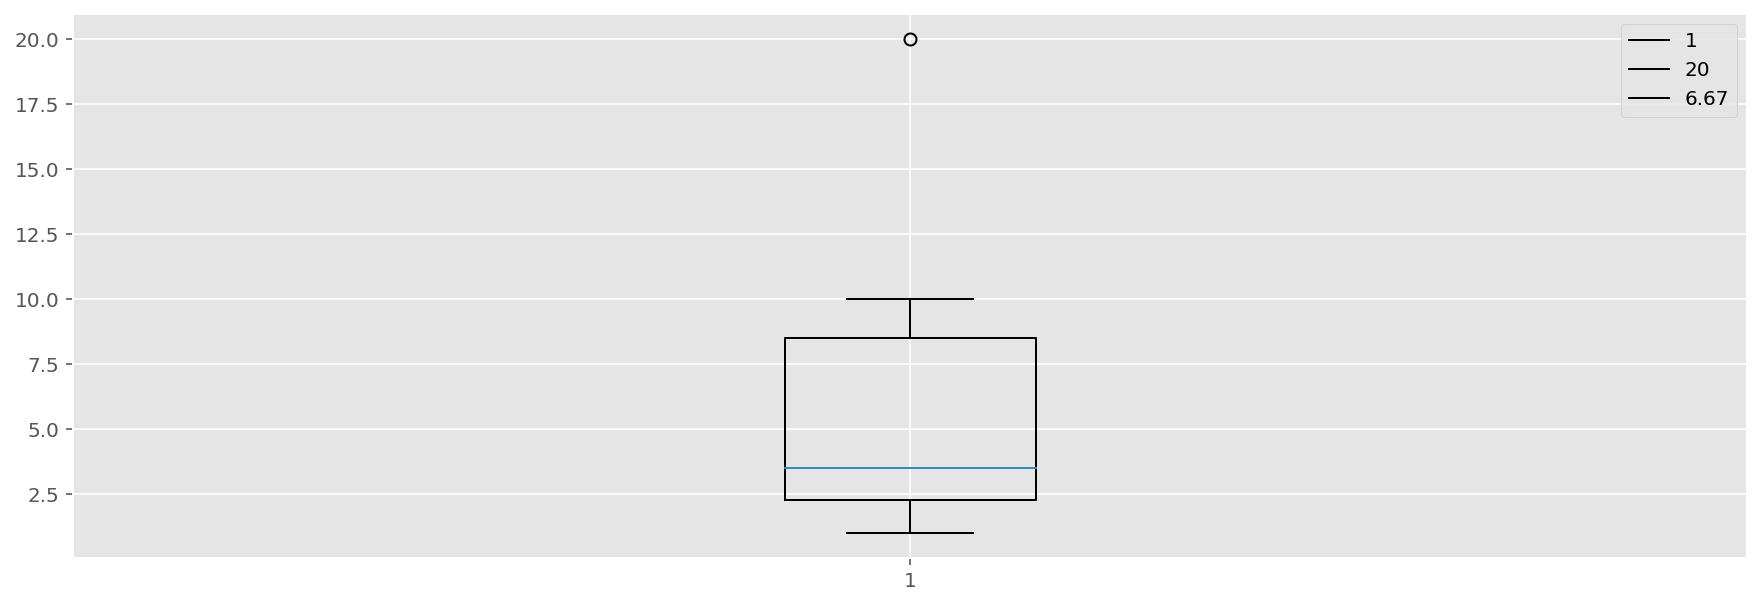

In [35]:
y = [1,2,3,4,10,20]
plt.boxplot(y)
plt.grid(True)
plt.legend([min(y),max(y),round(np.mean(y),2)], loc='best')
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Анимация <a name='animation'></a>

import matplotlib.animation as animation

t = np.linspace(-4, 4, 300)

fig, ax = plt.subplots()

#  Создаем функцию, генерирующую картинки
#  для последующей "склейки":
def animate(i):
    ax.clear()
    line = ax.plot(t, np.sin(i*t))
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.linspace(2, 4, 30),
                                      interval = 10,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('моя анимация.html',
                 writer='imagemagick', 
                 fps=30)

<a href='#toc'>Назад к Оглавлению</a>

# Трехмерная графика <a name='3d'></a>

#### Нарисовать точку в трехмерном пространстве

In [36]:
from mpl_toolkits.mplot3d import Axes3D

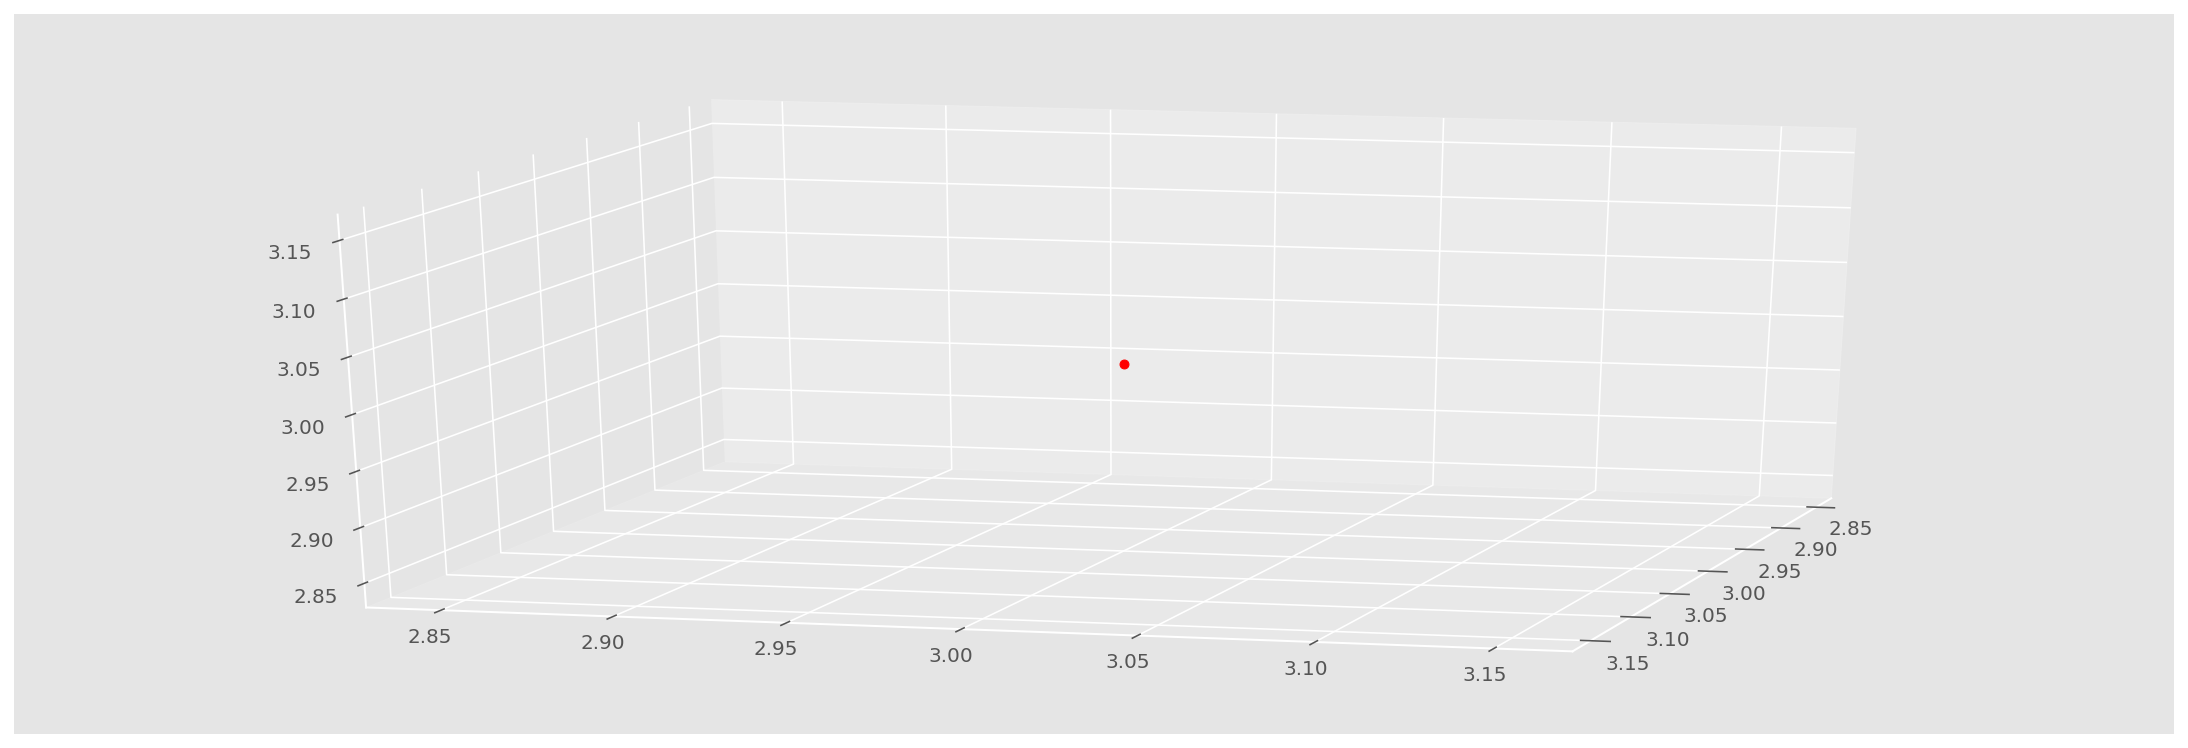

In [57]:
fig = plt.figure(1, figsize=(15,5))
plt.clf()
ax = Axes3D(fig, rect=[0,0,1,1], elev=20, azim=15)
plt.cla()
ax.scatter(3,3,3, c='r')

<a href='#toc'>Назад к Оглавлению</a>

# Разные задачи <a name='tasks'></a>

#### Нарисовать олимпийские кольца разного цвета.

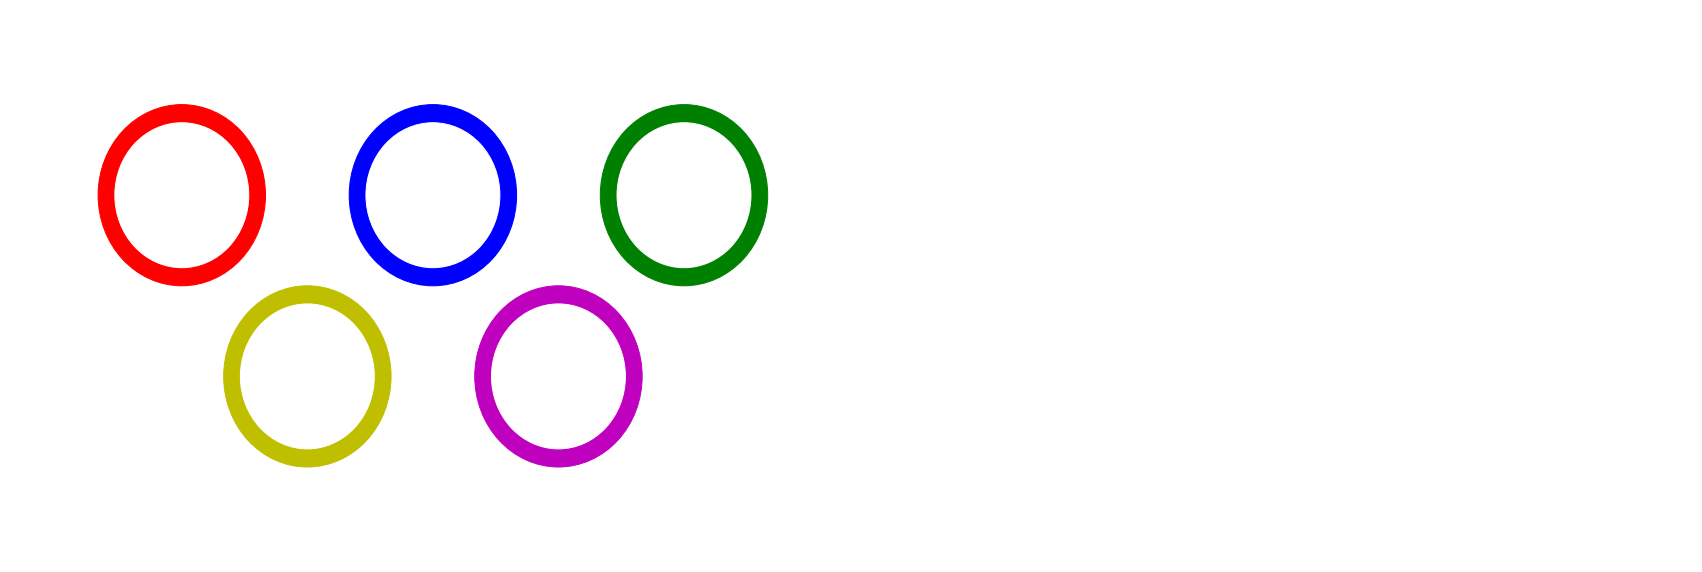

In [38]:
params =[((20, 40), 10, 'r'), ((20, 40), 8, 'w'),
         ((50, 40), 10, 'b'), ((50, 40), 8, 'w'),
         ((80, 40), 10, 'g'), ((80, 40), 8, 'w'),
         ((35, 20), 10, 'y'), ((35, 20), 8, 'w'),
         ((65, 20), 10, 'm'), ((65, 20), 8, 'w')]
fig, ax = plt.subplots() 
ax.set_xlim(0, 200)
ax.set_ylim(0, 60)
for elem in params:
    ax.add_artist(plt.Circle(elem[0], elem[1], color=elem[2]))
ax.axis('off')
plt.show()


#### Написать функцию-«принтер» точек на плоскости, координаты которых определяются случайным образом. Тоже самое для координат, распределенных случайным образом по нормальному закону.

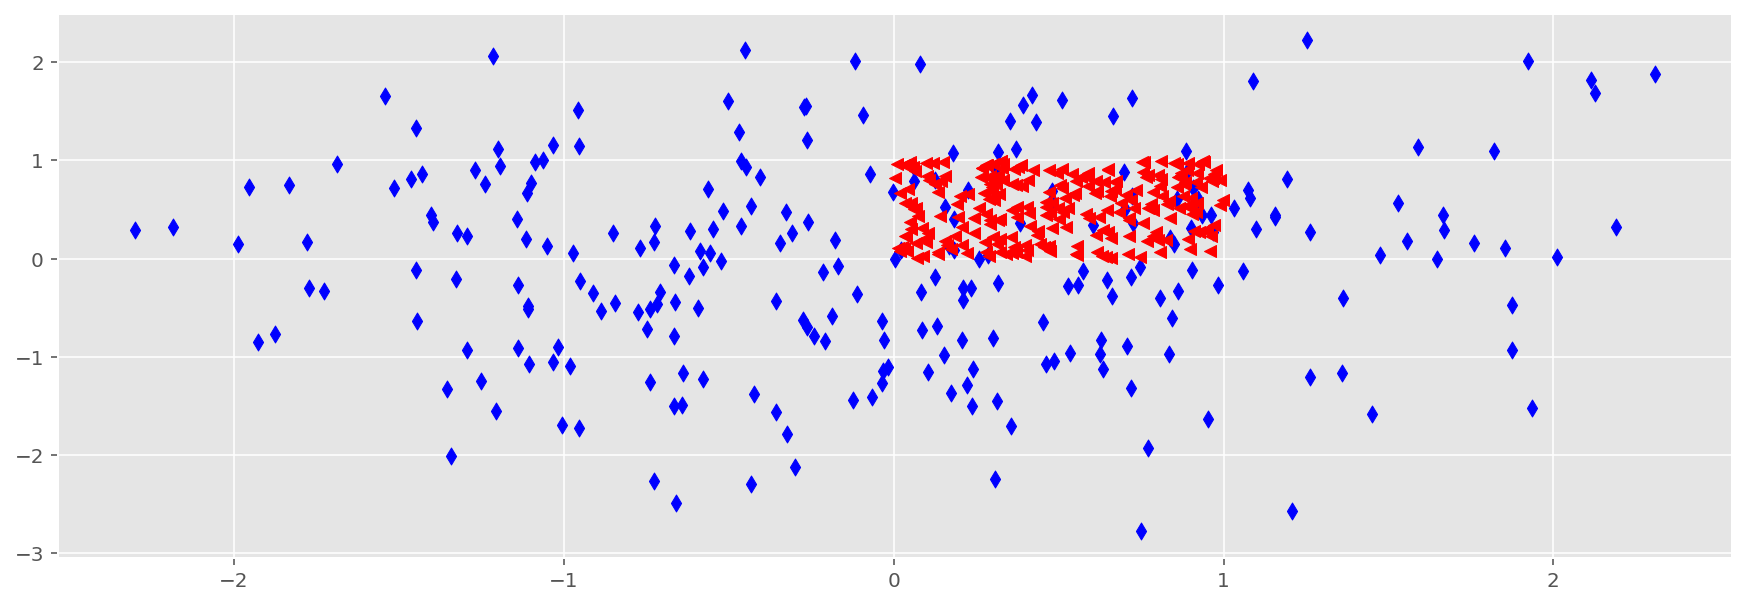

In [39]:
def f_plotter(p_plt, num):
    x1 = np.random.randn(num)
    y1 = np.random.randn(num)
    p_plt.scatter(x1, y1, color="b", marker="d")
    x2 = np.random.rand(num)
    y2 = np.random.rand(num)
    p_plt.scatter(x2, y2, color="r", marker="<")
    p_plt.show()
    
f_plotter(plt, 250)

#### Добавить несколько графиков на один рисунок

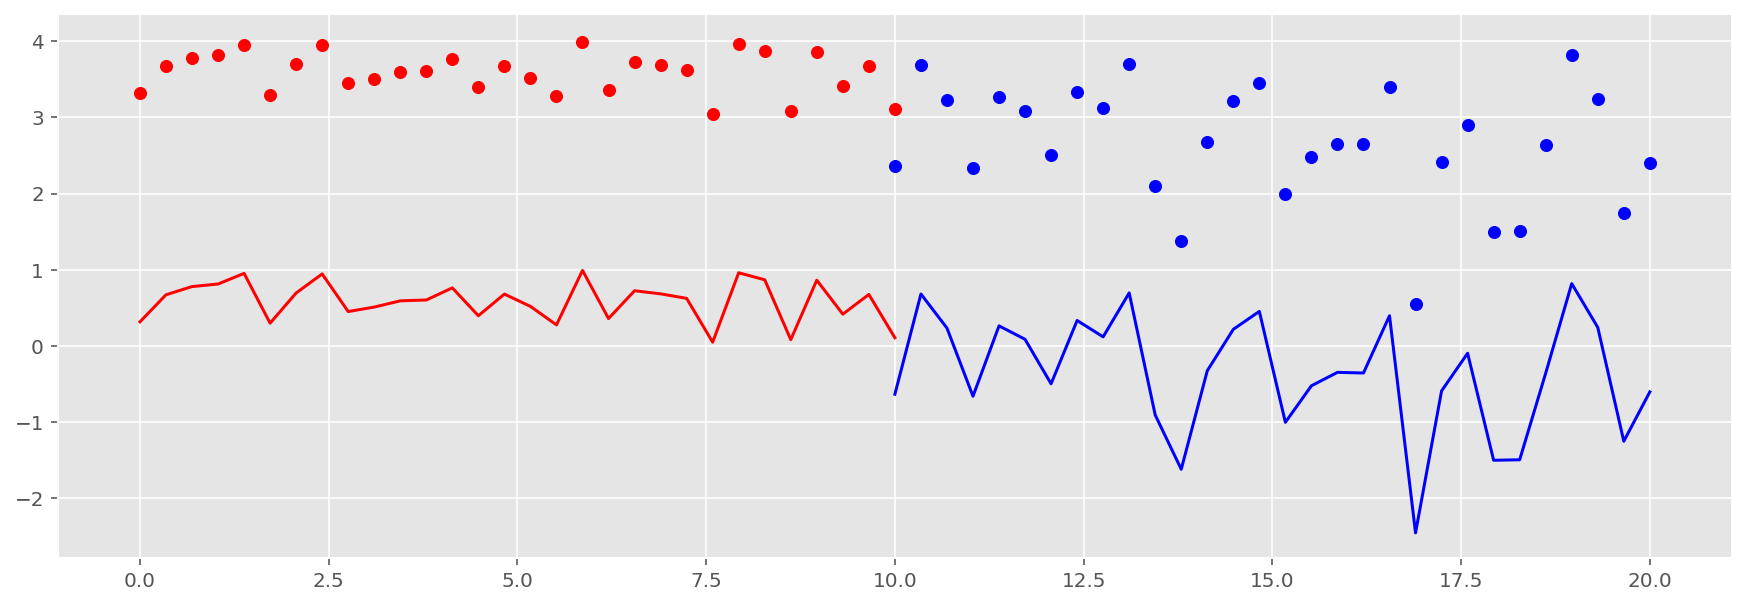

In [40]:
x = np.linspace(0,10,30)
y1 = np.random.rand(30)
y2 = np.random.randn(30)
fig,ax = plt.subplots()
ax.plot(x, y1, color="red")
ax.plot(x+10, y2, color="blue")
ax.scatter(x, y1+3, color="red")
ax.scatter(x+10, y2+3, color="blue")
plt.grid(True)
plt.show()

#### Нарисовать N шаров разного цвета и размера

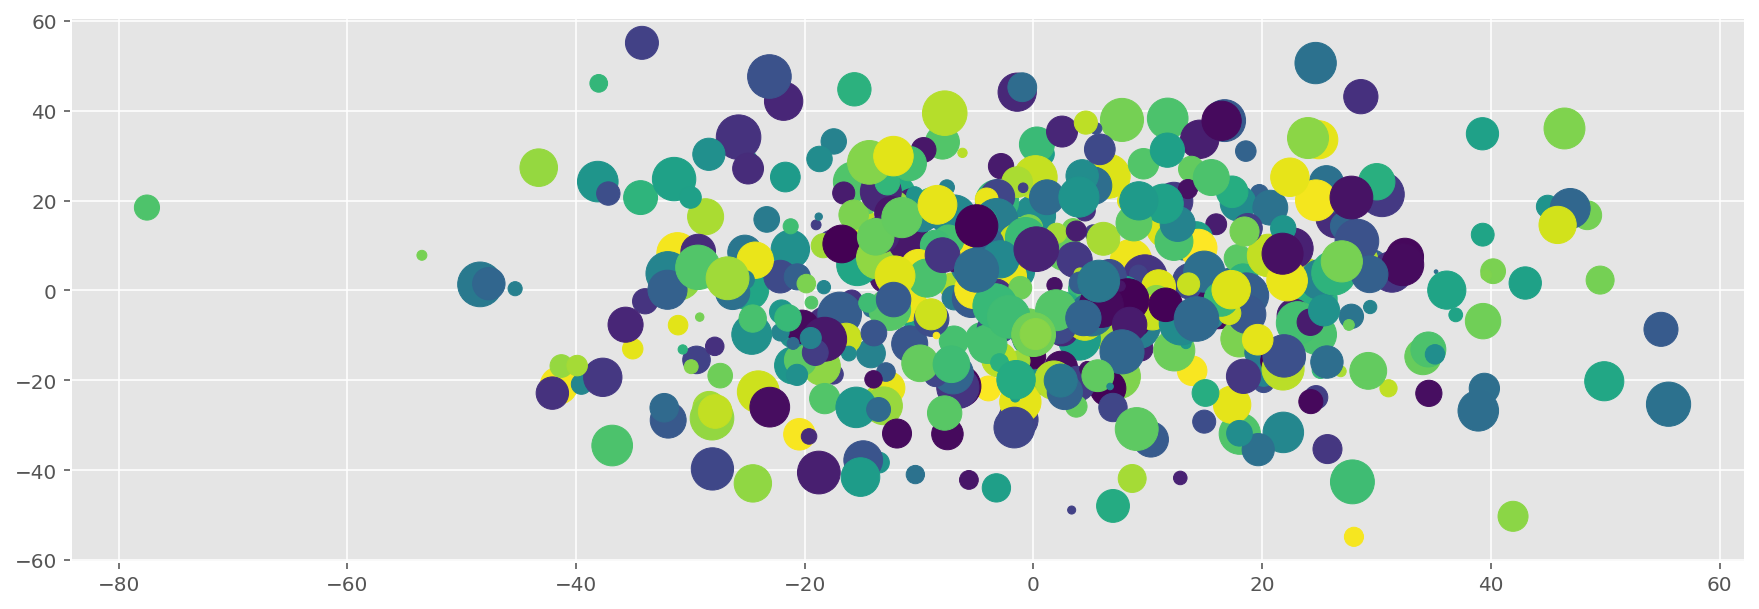

In [41]:
n=500
v_colors = np.random.rand(n)
v_sizes = 500*np.random.rand(n)
x = 20*np.random.randn(n)
y = 20*np.random.randn(n)
plt.scatter(x, y, marker="o", c=v_colors, s=v_sizes)
plt.show()

#### Показать данные как картинку с помощью функции imshow (Image Show)

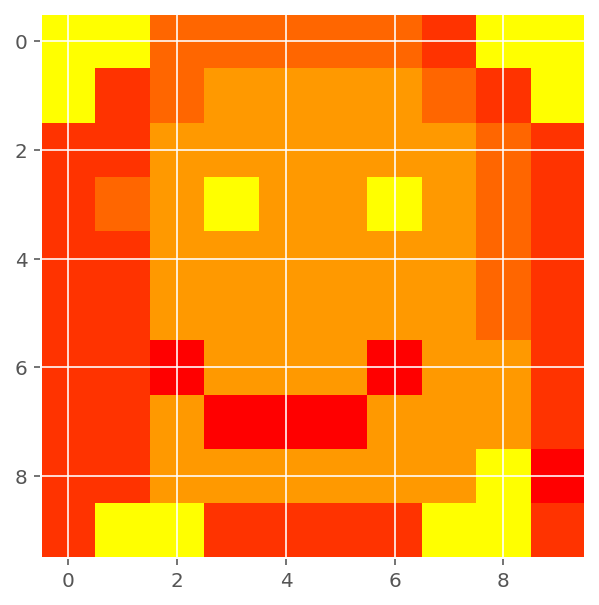

In [42]:
smile = [[5, 5, 2, 2, 2, 2, 2, 1, 5, 5],
         [5, 1, 2, 3, 3, 3, 3, 2, 1, 5],
         [1, 1, 3, 3, 3, 3, 3, 3, 2, 1],
         [1, 2, 3, 5, 3, 3, 5, 3, 2, 1],
         [1, 1, 3, 3, 3, 3, 3, 3, 2, 1],
         [1, 1, 3, 3, 3, 3, 3, 3, 2, 1],
         [1, 1, 0, 3, 3, 3, 0, 3, 3, 1],
         [1, 1, 3, 0, 0, 0, 3, 3, 3, 1],
         [1, 1, 3, 3, 3, 3, 3, 3, 5, 0],
         [1, 5, 5, 1, 1, 1, 1, 5, 5, 1]]
plt.imshow(smile, cmap='autumn')
plt.show()

In [61]:
from sklearn.datasets import load_digits

In [62]:
digit = load_digits()

In [64]:
digit.data[0].shape

(64,)

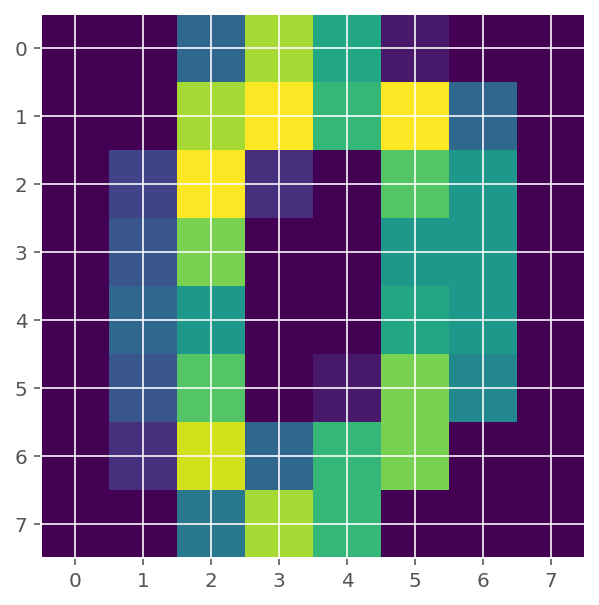

In [65]:
plt.imshow(digit.data[0].reshape(8,8))

#### Нарисовать линии уровня поверхности 

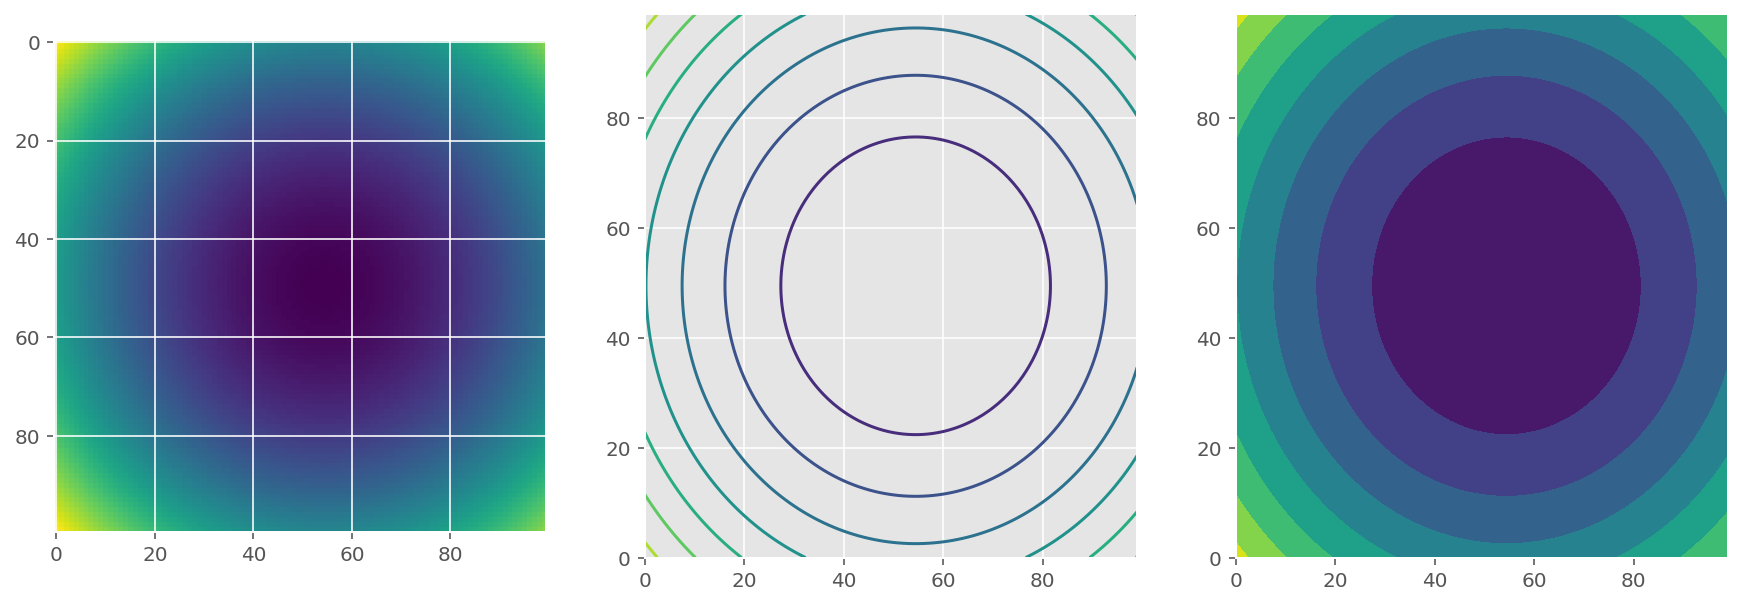

In [43]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
z = [[(i-1)**2 + j**2 for i in x] for j in y]
fig, ax = plt.subplots(1,3)
ax[0].imshow(z)
ax[1].contour(z)
ax[2].contourf(z)
plt.grid(True)
plt.show()

#### Создать массив случайных чисел, распределенных по нормальному закуну. Вычислить статистическое матожидание и дисперсию. Построить график плотности распределения.

-0.0081293833552376 1068.9697436311203


(array([ 6.,  6.,  6.,  6.,  6.,  8.,  8., 10., 13., 31.]),
 array([0.01164342, 0.01169926, 0.01175511, 0.01181095, 0.01186679,
        0.01192263, 0.01197848, 0.01203432, 0.01209016, 0.01214601,
        0.01220185]),
 <a list of 10 Patch objects>)

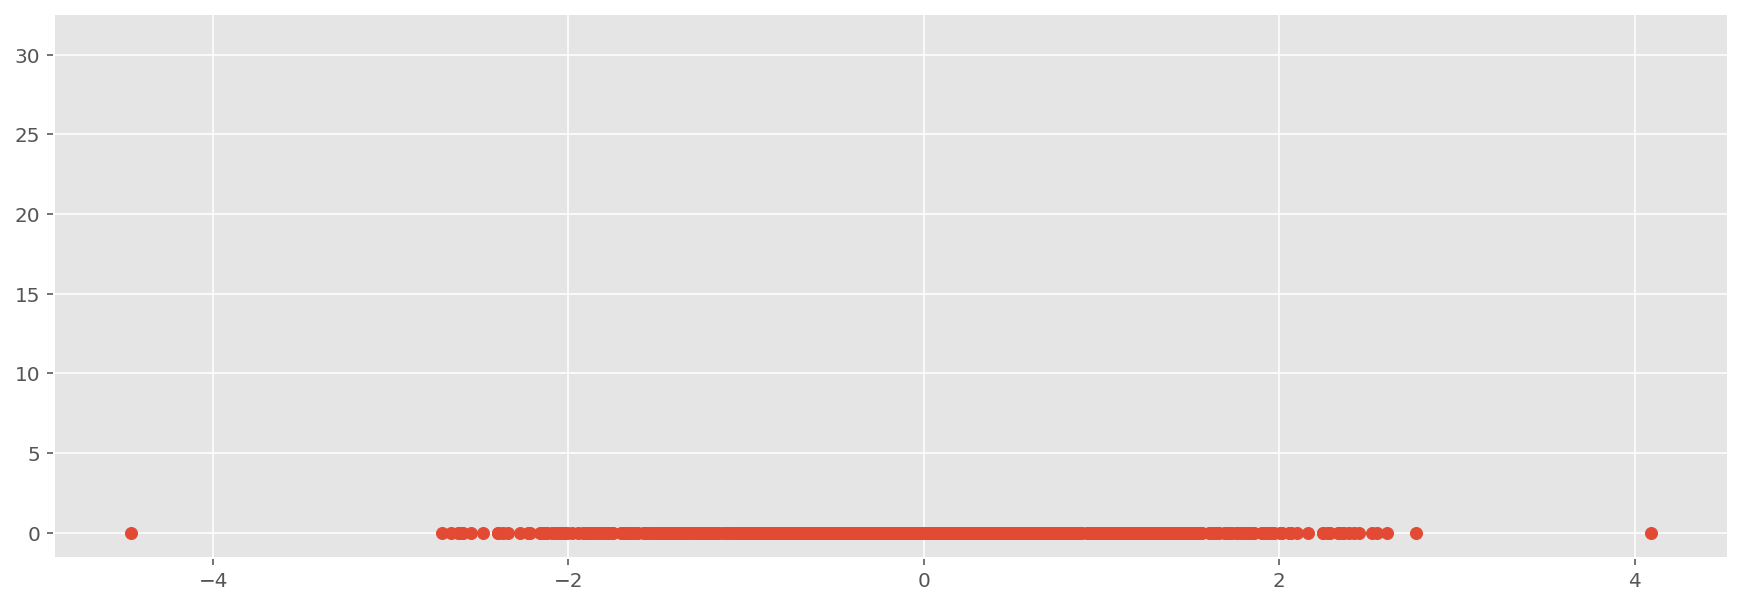

In [44]:
num = 1000
xs = np.random.randn(num)
ys = [0]*num
plt.scatter(xs, ys)

m = np.sum(xs)/len(xs)
D = np.sum([(i-m)**2 for i in xs])
print(m, D)

y1 = [norm(m, math.sqrt(D)).pdf(i) for i in x]
plt.hist(y1)

#### Нарисовать крест из точек

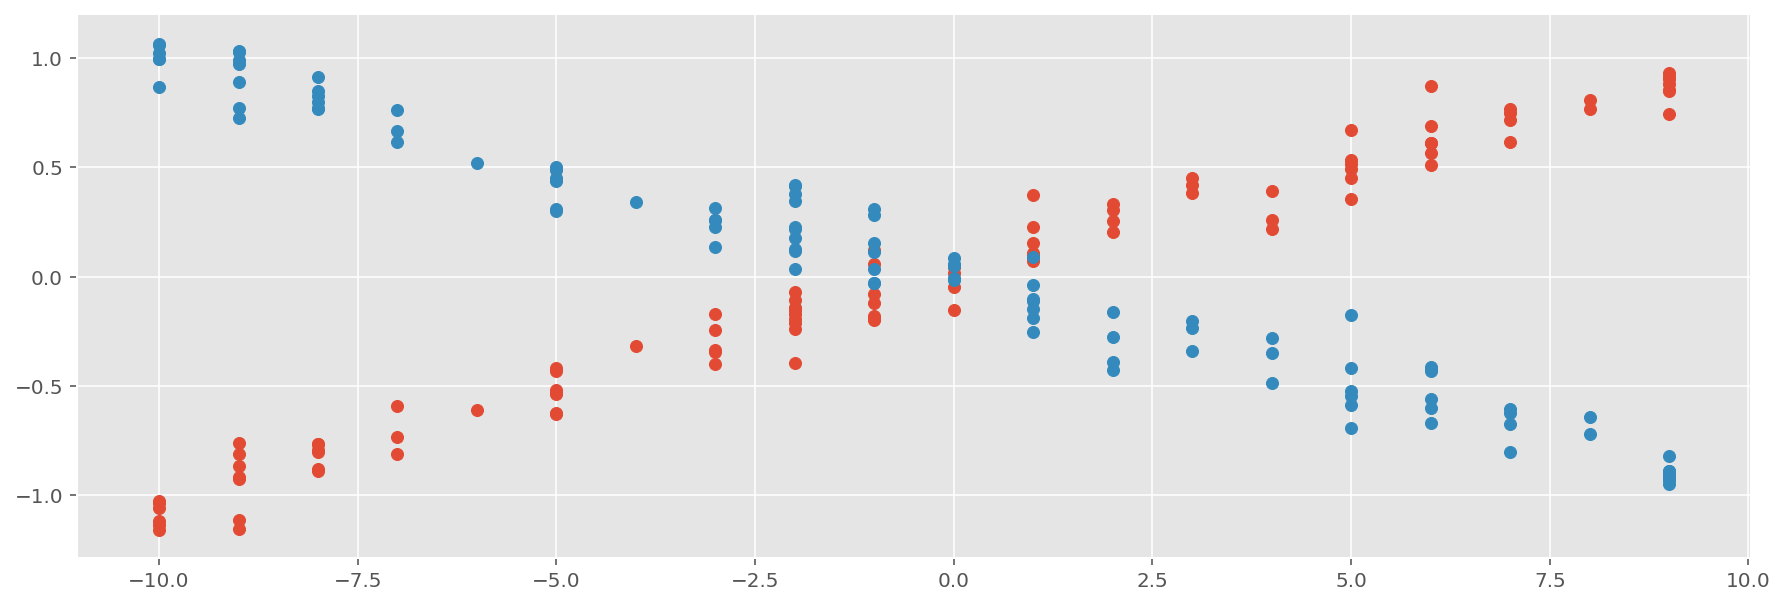

In [45]:
n = 100
x = [np.random.randint(-10,10) for _ in range(n)]
y1 = [(i+np.random.randn())/10 for i in x]
y2 = [(-i+np.random.randn())/10 for i in x]
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.show()

#### Закрасить различные области разными цветами (pcolormesh)

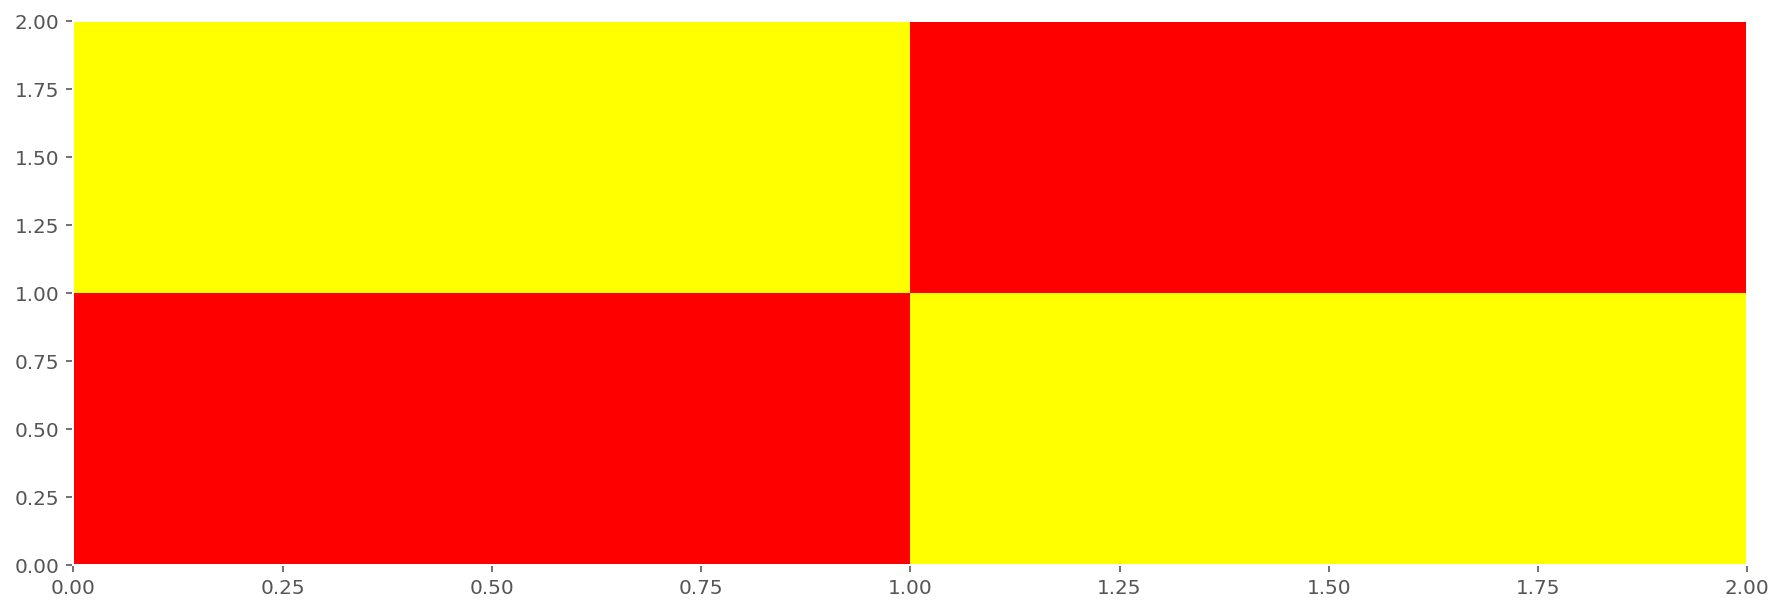

In [46]:
plt.pcolormesh([0,1,2], [0,1,2], [[0,1],[1,0]], cmap='autumn')
plt.show()

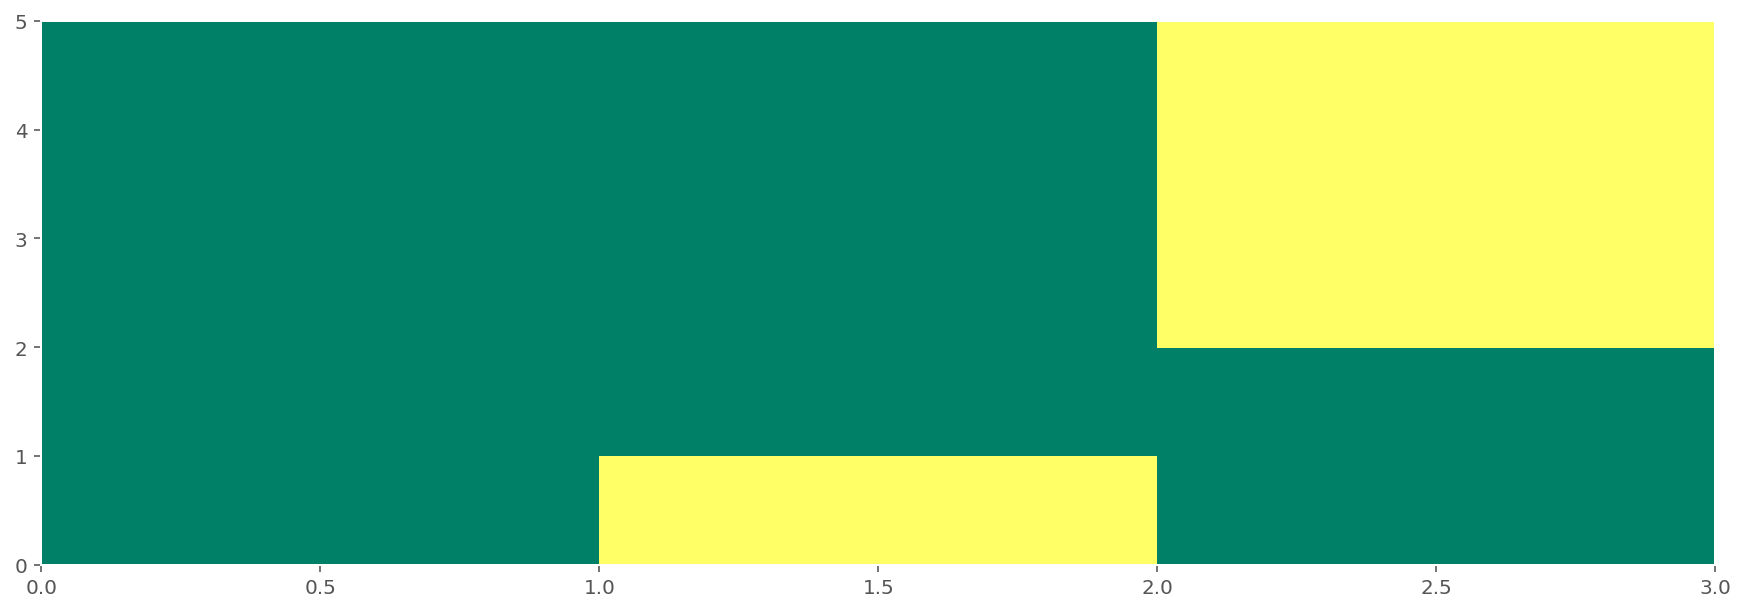

In [47]:
plt.pcolormesh([0,1,2,3], [0,1,2,5], np.array([np.random.choice([0,1]) for _ in range(9)]).reshape(3,3), cmap='summer')
plt.show()

#### Нарисовать флаги

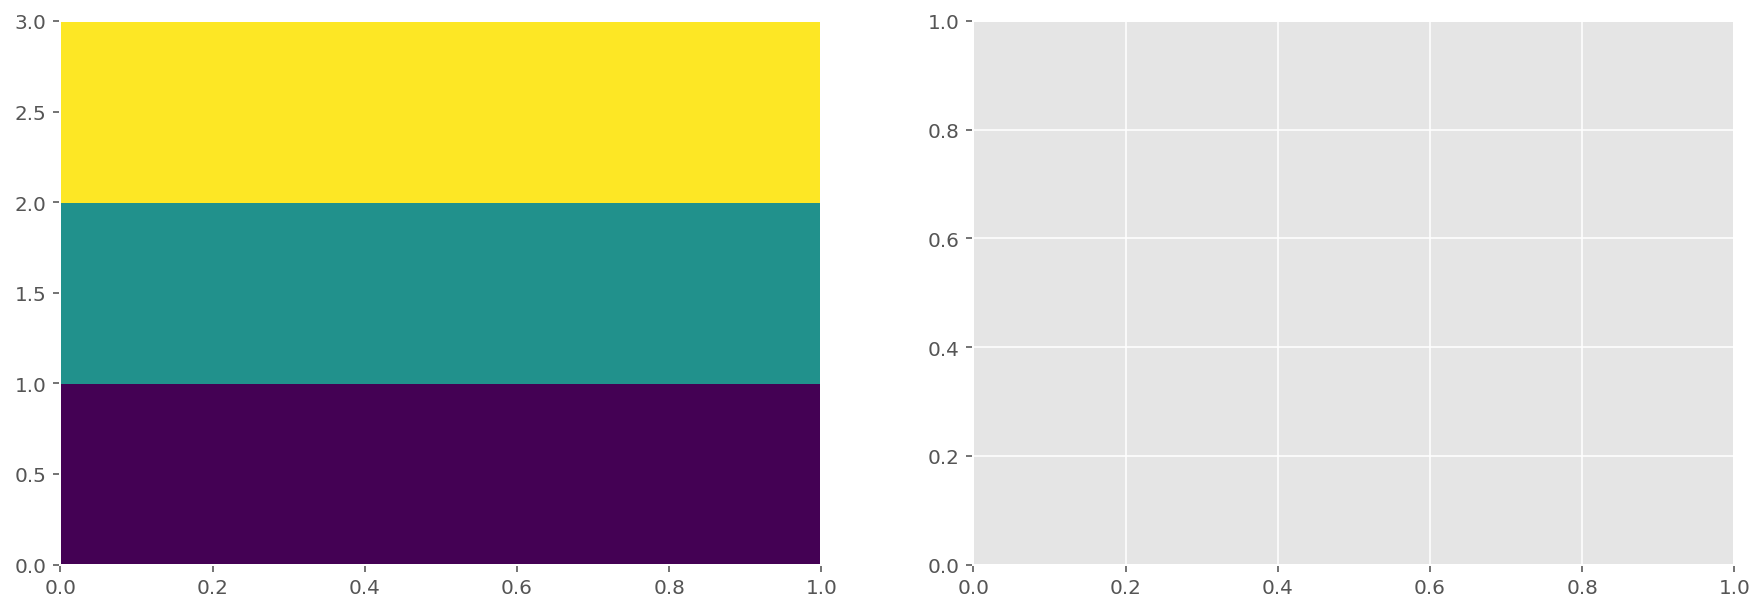

In [48]:
fig, ax = plt.subplots(1,2)
ax[0].pcolormesh([0,1], [0,1,2,3], [[0],[1],[2]])

#### Нарисовать кривую Коха

import turtle

n = 2
a=[60,-120,60]
for i in range(1,n):
    b=[]
    for j in range(len(a)):
        b.extend([60,-120,60]+[a[j]])
    b.extend([60,-120,60])
    a = b
print(a)

turtle.position()
for _ in range(4):
    turtle.forward(10)
    turtle.left(90)

from sklearn.datasets import load_digits
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show() 

#### Закрасить область между двумя линиями

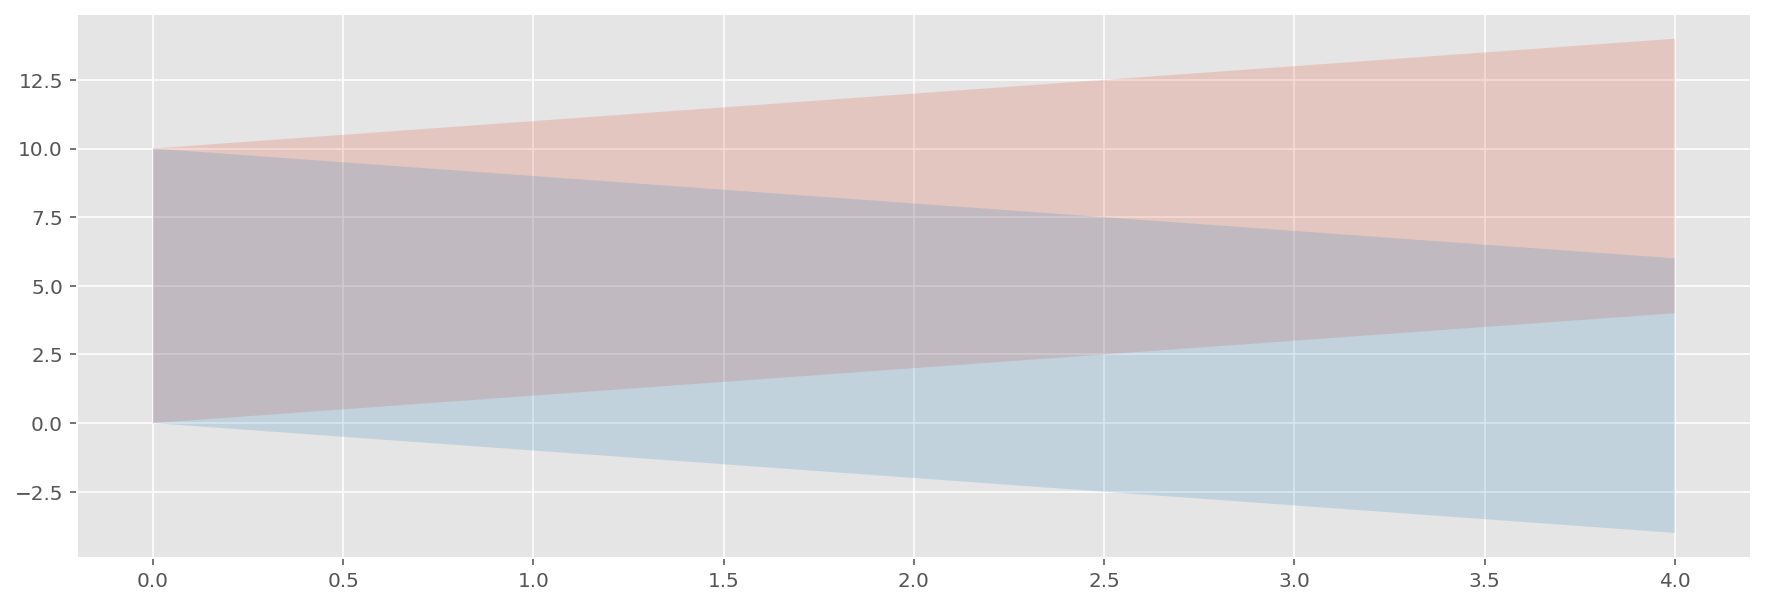

In [49]:
plt.fill_between(range(5), [i for i in range(5)], [i+10 for i in range(5)], alpha=0.2)
plt.fill_between(range(5), [-i for i in range(5)], [-i+10 for i in range(5)], alpha=0.2)

<a href='#toc'>Назад к Оглавлению</a>

# Ввод и вывод данных <a name='io'></a>

#### Сохранить диаграмму в файл.

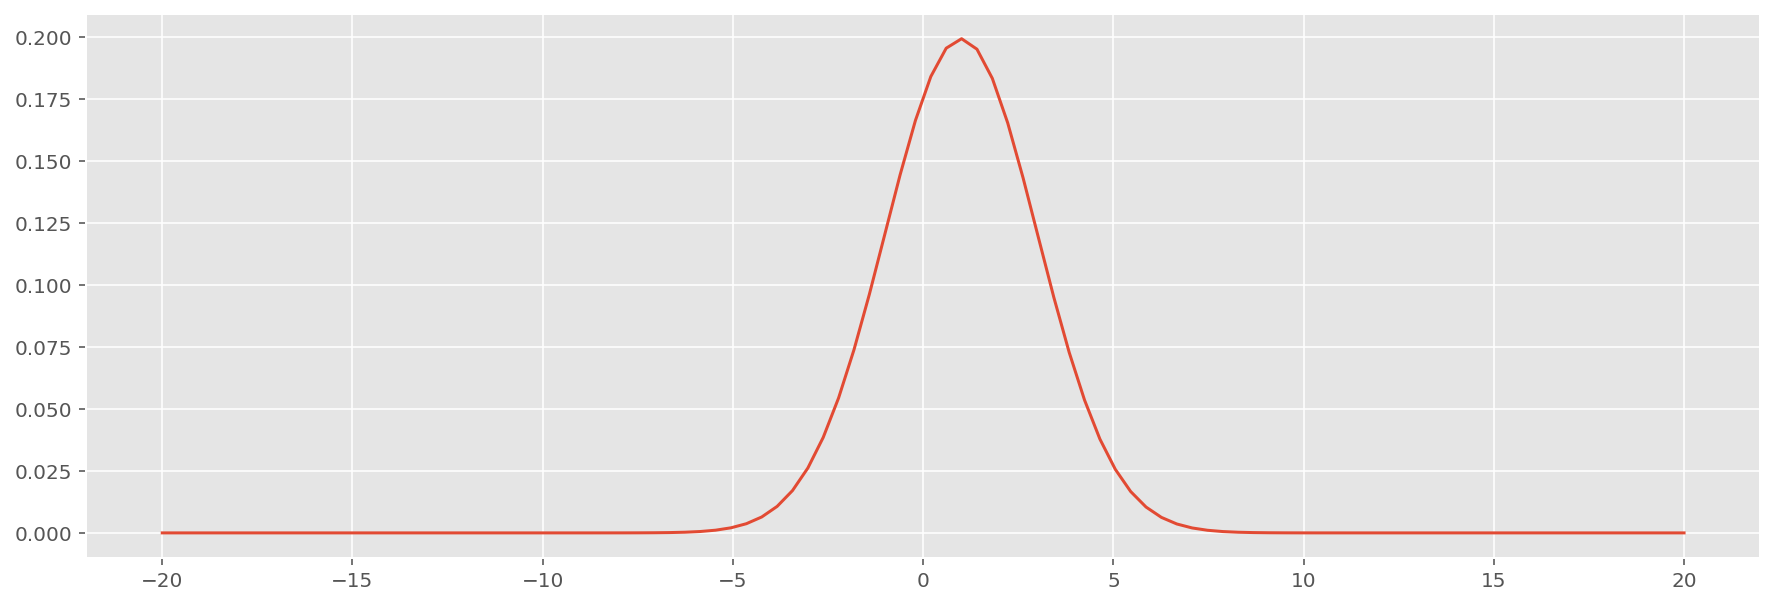

In [50]:
x = np.linspace(-20,20,100)
m, sigma = 1, 2
y1 = [norm(m,sigma).pdf(i) for i in x]
plt.plot(x,y1)
plt.savefig(r"fig.jpeg")

Прочитаем из файла
<img src='fig.jpeg'></img>

<a href='#toc'>Назад к Оглавлению</a>

# Ссылки <a name='links'></a>

http://www.matplotlib.org - официальная страница проекта matplotlib.

https://github.com/matplotlib/matplotlib - исходный код библиотеки matplotlib.

http://matplotlib.org/gallery.html - большая коллекция различных графиков с использованием matplotlib

http://www.loria.fr/~rougier/teaching/matplotlib - учебный курс

http://scipy-lectures.github.io/matplotlib/matplotlib.html - учебный курс

<a href='#toc'>Назад к Оглавлению</a>

# Задания для самостоятельной работы <a name='tasks'></a>

Задача 1

Задача 2


<a href='#toc'>Назад к Оглавлению</a>